In [1]:
import os
import sys
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy.special import expit

In [2]:
FIG_FOLDER = 'fig'
SOURCE_FOLDER = os.path.join('data', 'source')
BACKUP_FOLDER = os.path.join('data', 'backup')
print(f"The source folder is: {os.path.abspath(SOURCE_FOLDER)}")
print(f"The figure folder is: {os.path.abspath(FIG_FOLDER)}")
print(f"The backup folder is: {os.path.abspath(BACKUP_FOLDER)}")

# Create folders
for f in SOURCE_FOLDER, FIG_FOLDER, BACKUP_FOLDER:
    os.makedirs(f, exist_ok=True)

The source folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/data/source
The figure folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/fig
The backup folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/data/backup


# Import raw data

## ELO rating

In [3]:
data_path = os.path.join(SOURCE_FOLDER, "elo_matrix_ProspecTonk.xlsx")
df_elo = pd.read_excel(data_path)
df_elo.date = pd.to_datetime(df_elo.date)
df_elo = df_elo.set_index("date")
df_elo

nem   yak   ner   yoh   nen   wot   pac  las   anu   ola  ...  \
date                                                                   ...   
2016-10-25  1024  1009  1018   984   991  1010   991  982   991  1000  ...   
2016-10-26  1032  1009  1018  1003   991  1010   982  964   991   999  ...   
2016-10-27  1032  1009  1018  1003   991  1010   982  956   991   999  ...   
2016-10-28  1041  1009  1018  1003   991  1010   982  956   991   999  ...   
2016-10-29  1063  1009  1018  1011   991  1010   975  941   984  1008  ...   
...          ...   ...   ...   ...   ...   ...   ...  ...   ...   ...  ...   
2020-10-21   938  1243   961   840  1018  1234  1379  713  1117  1287  ...   
2020-10-22   970  1243   962   840  1018  1234  1347  716  1105  1296  ...   
2020-10-23   971  1243   970   840  1018  1234  1347  735  1105  1296  ...   
2020-10-24   971  1243   981   840  1018  1234  1352  731  1105  1291  ...   
2020-10-25   974  1243   992   840  1018  1234  1357  724  1105  1296  ...   

             olg   jea   pat   bar   ces   lad   ber   dor   eri   fic  
date                                                                    
2016-10-25  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
2016-10-26  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
2016-10-27  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
2016-10-28  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
2016-10-29  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
2020-10-21   933   760   841  1083   837   753   743   766   702   579  
2020-10-22   935   755   841  1070   832   753   743   795   702   566  
2020-10-23   920   751   841  1072   838   753   758   773   668   566  
2020-10-24   923   750   841  1062   822   753   758   781   666   580  
2020-10-25   908   740   841  1062   807   753   763   787   675   575  

[1462 rows x 27 columns]

In [4]:
df_elo.to_csv(os.path.join(BACKUP_FOLDER, "df_elo.csv"))

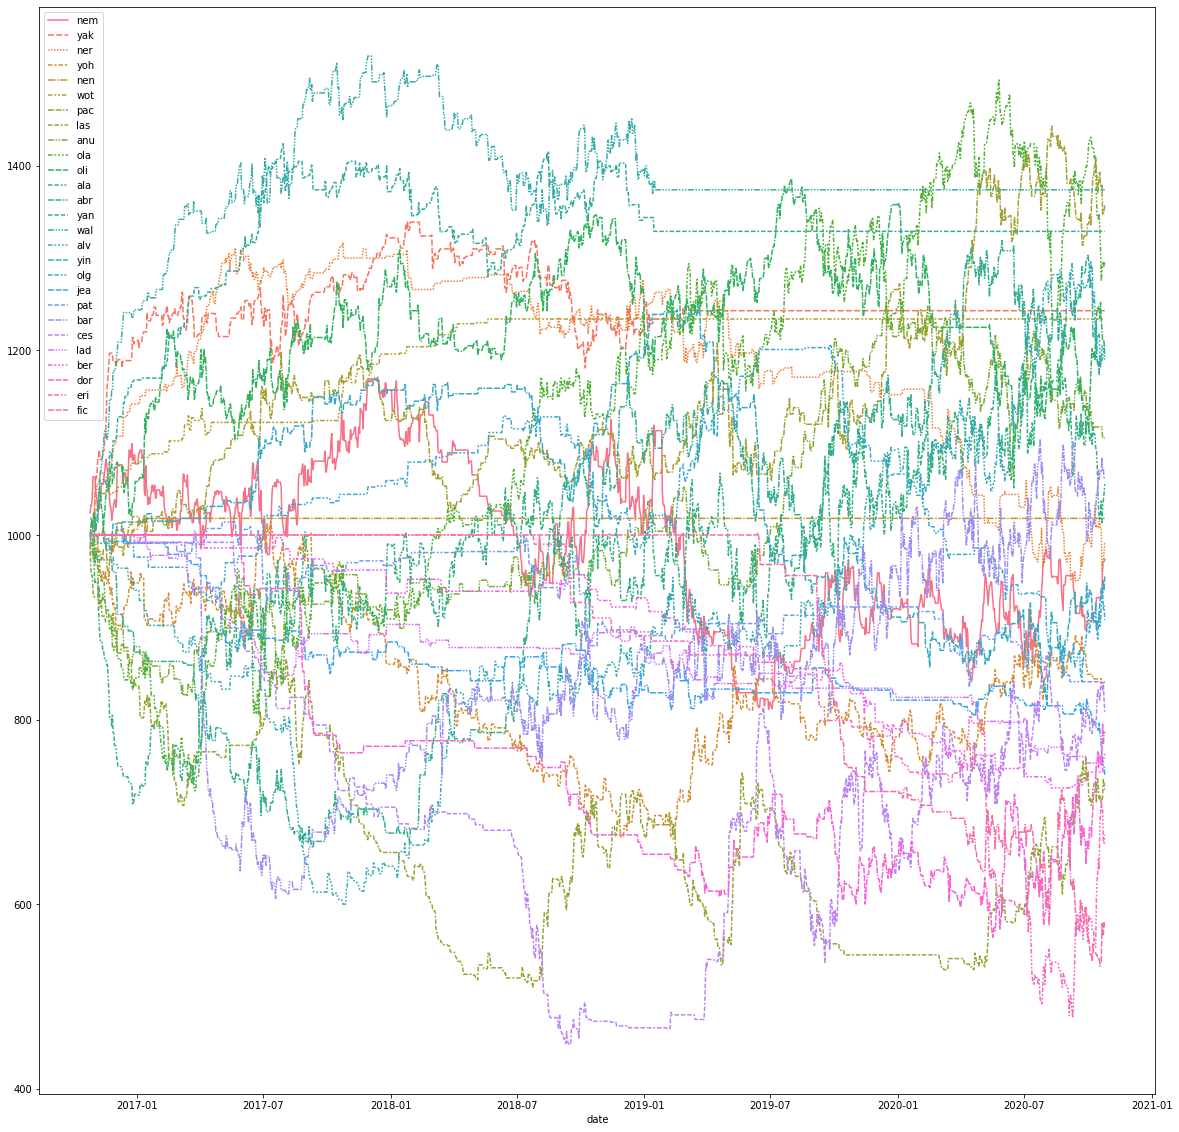

In [5]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.lineplot(data=df_elo, ax=ax)
ax.legend()
plt.show()

## Behavioral data

In [6]:
data_path = os.path.join(SOURCE_FOLDER, "data_B.xlsx")
df_bhv = pd.read_excel(data_path, 
                   usecols=("monkey", "date", "choice", "stim_left_p", "stim_left_x0", "stim_right_p", 
                            "stim_right_x0", "time_response", 
                            "left_X", "left_Y", "right_X", "right_Y"))
df_bhv

monkey            date  choice  stim_left_p  stim_left_x0  \
0         Ola  2020-06-25None       0         0.75             2   
1         Ola  2020-06-25None       0         0.50             3   
2         Ola  2020-06-25None       0         0.75             2   
3         Ola  2020-06-25None       0         0.25            -2   
4         Ola  2020-06-25None       0         0.75            -1   
...       ...             ...     ...          ...           ...   
146420    Alv  2020-10-25None       0         0.25            -2   
146421    Alv  2020-10-25None       0         1.00            -2   
146422    Alv  2020-10-25None       1         0.25             3   
146423    Alv  2020-10-25None       0         1.00             1   
146424    Alv  2020-10-25None       1         1.00             3   

        stim_right_p  stim_right_x0  time_response  left_X  left_Y  right_X  \
0               0.75              3            528  1195.0   131.0   1195.0   
1               0.25              3            506  1195.0   131.0   1195.0   
2               0.75             -2            394   469.0   131.0    469.0   
3               0.25             -3            396   469.0   131.0    469.0   
4               0.75             -3            329   469.0   131.0    469.0   
...              ...            ...            ...     ...     ...      ...   
146420          1.00             -1           1074  1195.0   131.0   1195.0   
146421          1.00             -3           1995   469.0   131.0    469.0   
146422          0.75              2            843  1195.0   131.0   1195.0   
146423          0.25              1            703   469.0   131.0    469.0   
146424          0.50              3            683   469.0   131.0    469.0   

        right_Y  
0         517.0  
1         517.0  
2         517.0  
3         517.0  
4         517.0  
...         ...  
146420    517.0  
146421    517.0  
146422    517.0  
146423    517.0  
146424    517.0  

[146425 rows x 12 columns]

In [7]:
df_bhv.dropna(axis=0, inplace=True)
df_bhv

monkey            date  choice  stim_left_p  stim_left_x0  \
0         Ola  2020-06-25None       0         0.75             2   
1         Ola  2020-06-25None       0         0.50             3   
2         Ola  2020-06-25None       0         0.75             2   
3         Ola  2020-06-25None       0         0.25            -2   
4         Ola  2020-06-25None       0         0.75            -1   
...       ...             ...     ...          ...           ...   
146420    Alv  2020-10-25None       0         0.25            -2   
146421    Alv  2020-10-25None       0         1.00            -2   
146422    Alv  2020-10-25None       1         0.25             3   
146423    Alv  2020-10-25None       0         1.00             1   
146424    Alv  2020-10-25None       1         1.00             3   

        stim_right_p  stim_right_x0  time_response  left_X  left_Y  right_X  \
0               0.75              3            528  1195.0   131.0   1195.0   
1               0.25              3            506  1195.0   131.0   1195.0   
2               0.75             -2            394   469.0   131.0    469.0   
3               0.25             -3            396   469.0   131.0    469.0   
4               0.75             -3            329   469.0   131.0    469.0   
...              ...            ...            ...     ...     ...      ...   
146420          1.00             -1           1074  1195.0   131.0   1195.0   
146421          1.00             -3           1995   469.0   131.0    469.0   
146422          0.75              2            843  1195.0   131.0   1195.0   
146423          0.25              1            703   469.0   131.0    469.0   
146424          0.50              3            683   469.0   131.0    469.0   

        right_Y  
0         517.0  
1         517.0  
2         517.0  
3         517.0  
4         517.0  
...         ...  
146420    517.0  
146421    517.0  
146422    517.0  
146423    517.0  
146424    517.0  

[137297 rows x 12 columns]

Format the dates

In [8]:
df_bhv.date = df_bhv.date.apply(lambda element: element.replace("None", ""))
df_bhv.date = pd.to_datetime(df_bhv.date)
df_bhv

monkey       date  choice  stim_left_p  stim_left_x0  stim_right_p  \
0         Ola 2020-06-25       0         0.75             2          0.75   
1         Ola 2020-06-25       0         0.50             3          0.25   
2         Ola 2020-06-25       0         0.75             2          0.75   
3         Ola 2020-06-25       0         0.25            -2          0.25   
4         Ola 2020-06-25       0         0.75            -1          0.75   
...       ...        ...     ...          ...           ...           ...   
146420    Alv 2020-10-25       0         0.25            -2          1.00   
146421    Alv 2020-10-25       0         1.00            -2          1.00   
146422    Alv 2020-10-25       1         0.25             3          0.75   
146423    Alv 2020-10-25       0         1.00             1          0.25   
146424    Alv 2020-10-25       1         1.00             3          0.50   

        stim_right_x0  time_response  left_X  left_Y  right_X  right_Y  
0                   3            528  1195.0   131.0   1195.0    517.0  
1                   3            506  1195.0   131.0   1195.0    517.0  
2                  -2            394   469.0   131.0    469.0    517.0  
3                  -3            396   469.0   131.0    469.0    517.0  
4                  -3            329   469.0   131.0    469.0    517.0  
...               ...            ...     ...     ...      ...      ...  
146420             -1           1074  1195.0   131.0   1195.0    517.0  
146421             -3           1995   469.0   131.0    469.0    517.0  
146422              2            843  1195.0   131.0   1195.0    517.0  
146423              1            703   469.0   131.0    469.0    517.0  
146424              3            683   469.0   131.0    469.0    517.0  

[137297 rows x 12 columns]

Rename the columns

In [9]:
new = {"choice": "c"}
for (var, new_var) in (("p", "p"), ("x0", "x")):
    for (side, new_side) in (("left", "0"), ("right", "1")):
        new.update({f'stim_{side}_{var}': f'{new_var}{new_side}'})
df_bhv.rename(columns=new, inplace=True)
df_bhv

monkey       date  c    p0  x0    p1  x1  time_response  left_X  \
0         Ola 2020-06-25  0  0.75   2  0.75   3            528  1195.0   
1         Ola 2020-06-25  0  0.50   3  0.25   3            506  1195.0   
2         Ola 2020-06-25  0  0.75   2  0.75  -2            394   469.0   
3         Ola 2020-06-25  0  0.25  -2  0.25  -3            396   469.0   
4         Ola 2020-06-25  0  0.75  -1  0.75  -3            329   469.0   
...       ...        ... ..   ...  ..   ...  ..            ...     ...   
146420    Alv 2020-10-25  0  0.25  -2  1.00  -1           1074  1195.0   
146421    Alv 2020-10-25  0  1.00  -2  1.00  -3           1995   469.0   
146422    Alv 2020-10-25  1  0.25   3  0.75   2            843  1195.0   
146423    Alv 2020-10-25  0  1.00   1  0.25   1            703   469.0   
146424    Alv 2020-10-25  1  1.00   3  0.50   3            683   469.0   

        left_Y  right_X  right_Y  
0        131.0   1195.0    517.0  
1        131.0   1195.0    517.0  
2        131.0    469.0    517.0  
3        131.0    469.0    517.0  
4        131.0    469.0    517.0  
...        ...      ...      ...  
146420   131.0   1195.0    517.0  
146421   131.0    469.0    517.0  
146422   131.0   1195.0    517.0  
146423   131.0    469.0    517.0  
146424   131.0    469.0    517.0  

[137297 rows x 12 columns]

Set the type of trial for each line

In [10]:
lottery_types = {}

new_cols = (
    "is_gain", "is_loss", "is_gain_vs_loss", 
    "is_risky_left", "is_risky_right", 
    "is_same_p", "is_same_x", 
    "is_best_left", "is_best_right",
    "pair_id",
    "is_control", "is_risky", "is_neither_risky_nor_control",
    "is_reversed",
    "choose_risky", "choose_best")
new_content = {k: [] for k in new_cols}

for i, e in tqdm(df_bhv.iterrows(), file=sys.stdout, total=len(df_bhv)):
    e.is_gain = e.x0 >= 0 and e.x1 >= 0
    e.is_loss = e.x0 <= 0 and e.x1 <= 0
    e.is_gain_vs_loss = not (e.is_gain or e.is_loss)

    e.is_risky_left = not e.is_gain_vs_loss and \
        np.abs(e.x0) > np.abs(e.x1) and e.p0 < e.p1
    e.is_risky_right = not e.is_gain_vs_loss and \
        np.abs(e.x0) < np.abs(e.x1) and e.p0 > e.p1

    e.is_risky = e.is_risky_left or e.is_risky_right

    e.is_same_p = e.p0 == e.p1
    e.is_same_x = e.x0 == e.x1
    e.is_best_left = \
        (e.x0 > e.x1 and e.is_same_p) \
        or (e.p0 > e.p1 and e.is_same_x and e.is_gain) \
        or (e.p0 < e.p1 and e.is_same_x and e.is_loss) \
        or (e.is_gain_vs_loss)
    e.is_best_right = \
        not e.is_risky and not e.is_best_left

    e.is_control = e.is_best_left or e.is_best_right

    e.is_neither_risky_nor_control = not (e.is_control or e.is_risky)
    
    if not e.is_neither_risky_nor_control:

        if (e.is_risky and e.is_risky_left) or (e.is_control and e.is_best_left):
            pair = (e.p0, e.x0, e.p1, e.x1)
            e.is_reversed = False
        else:
            pair = (e.p1, e.x1, e.p0, e.x0)
            e.is_reversed = True
        try:
            e.pair_id = lottery_types[pair]
        except KeyError:
            e.pair_id = len(lottery_types)
            lottery_types[pair] = e.pair_id
        
        e.choose_best = (e.is_best_left and e.c == 0) or (e.is_best_right and e.c == 1)
        e.choose_risky = (e.is_risky_left and e.c == 0) or (e.is_risky_right and e.c == 1)
        
    else:
        e.pair_id = -1
        e.is_reversed = False
        e.choose_best = False
        e.choose_risky = False

    for k in new_cols:
        v = getattr(e, k)
        new_content[k].append(v)

for k in new_cols:
    df_bhv[k] = new_content[k]

100%|██████████| 137297/137297 [00:51<00:00, 2667.37it/s]


In [11]:
df_bhv

monkey       date  c    p0  x0    p1  x1  time_response  left_X  \
0         Ola 2020-06-25  0  0.75   2  0.75   3            528  1195.0   
1         Ola 2020-06-25  0  0.50   3  0.25   3            506  1195.0   
2         Ola 2020-06-25  0  0.75   2  0.75  -2            394   469.0   
3         Ola 2020-06-25  0  0.25  -2  0.25  -3            396   469.0   
4         Ola 2020-06-25  0  0.75  -1  0.75  -3            329   469.0   
...       ...        ... ..   ...  ..   ...  ..            ...     ...   
146420    Alv 2020-10-25  0  0.25  -2  1.00  -1           1074  1195.0   
146421    Alv 2020-10-25  0  1.00  -2  1.00  -3           1995   469.0   
146422    Alv 2020-10-25  1  0.25   3  0.75   2            843  1195.0   
146423    Alv 2020-10-25  0  1.00   1  0.25   1            703   469.0   
146424    Alv 2020-10-25  1  1.00   3  0.50   3            683   469.0   

        left_Y  ...  is_same_x  is_best_left  is_best_right  pair_id  \
0        131.0  ...      False         False           True        0   
1        131.0  ...       True          True          False        1   
2        131.0  ...      False          True          False        2   
3        131.0  ...      False          True          False        3   
4        131.0  ...      False          True          False        4   
...        ...  ...        ...           ...            ...      ...   
146420   131.0  ...      False         False          False       83   
146421   131.0  ...      False          True          False       30   
146422   131.0  ...      False         False          False        9   
146423   131.0  ...       True          True          False       17   
146424   131.0  ...       True          True          False       26   

        is_control  is_risky  is_neither_risky_nor_control  is_reversed  \
0             True     False                         False         True   
1             True     False                         False        False   
2             True     False                         False        False   
3             True     False                         False        False   
4             True     False                         False        False   
...            ...       ...                           ...          ...   
146420       False      True                         False        False   
146421        True     False                         False        False   
146422       False      True                         False        False   
146423        True     False                         False        False   
146424        True     False                         False        False   

        choose_risky  choose_best  
0              False        False  
1              False         True  
2              False         True  
3              False         True  
4              False         True  
...              ...          ...  
146420          True        False  
146421         False         True  
146422         False        False  
146423         False         True  
146424         False        False  

[137297 rows x 28 columns]

In [12]:
df_bhv.to_csv(os.path.join(BACKUP_FOLDER, "df_bhv"), index=False)

# Import formated data

In [13]:
df_bhv = pd.read_csv(os.path.join(BACKUP_FOLDER, "df_bhv"))
df_bhv.date = pd.to_datetime(df_bhv.date)
df_bhv

monkey       date  c    p0  x0    p1  x1  time_response  left_X  \
0         Ola 2020-06-25  0  0.75   2  0.75   3            528  1195.0   
1         Ola 2020-06-25  0  0.50   3  0.25   3            506  1195.0   
2         Ola 2020-06-25  0  0.75   2  0.75  -2            394   469.0   
3         Ola 2020-06-25  0  0.25  -2  0.25  -3            396   469.0   
4         Ola 2020-06-25  0  0.75  -1  0.75  -3            329   469.0   
...       ...        ... ..   ...  ..   ...  ..            ...     ...   
137292    Alv 2020-10-25  0  0.25  -2  1.00  -1           1074  1195.0   
137293    Alv 2020-10-25  0  1.00  -2  1.00  -3           1995   469.0   
137294    Alv 2020-10-25  1  0.25   3  0.75   2            843  1195.0   
137295    Alv 2020-10-25  0  1.00   1  0.25   1            703   469.0   
137296    Alv 2020-10-25  1  1.00   3  0.50   3            683   469.0   

        left_Y  ...  is_same_x  is_best_left  is_best_right  pair_id  \
0        131.0  ...      False         False           True        0   
1        131.0  ...       True          True          False        1   
2        131.0  ...      False          True          False        2   
3        131.0  ...      False          True          False        3   
4        131.0  ...      False          True          False        4   
...        ...  ...        ...           ...            ...      ...   
137292   131.0  ...      False         False          False       83   
137293   131.0  ...      False          True          False       30   
137294   131.0  ...      False         False          False        9   
137295   131.0  ...       True          True          False       17   
137296   131.0  ...       True          True          False       26   

        is_control  is_risky  is_neither_risky_nor_control  is_reversed  \
0             True     False                         False         True   
1             True     False                         False        False   
2             True     False                         False        False   
3             True     False                         False        False   
4             True     False                         False        False   
...            ...       ...                           ...          ...   
137292       False      True                         False        False   
137293        True     False                         False        False   
137294       False      True                         False        False   
137295        True     False                         False        False   
137296        True     False                         False        False   

        choose_risky  choose_best  
0              False        False  
1              False         True  
2              False         True  
3              False         True  
4              False         True  
...              ...          ...  
137292          True        False  
137293         False         True  
137294         False        False  
137295         False         True  
137296         False        False  

[137297 rows x 28 columns]

# Counts

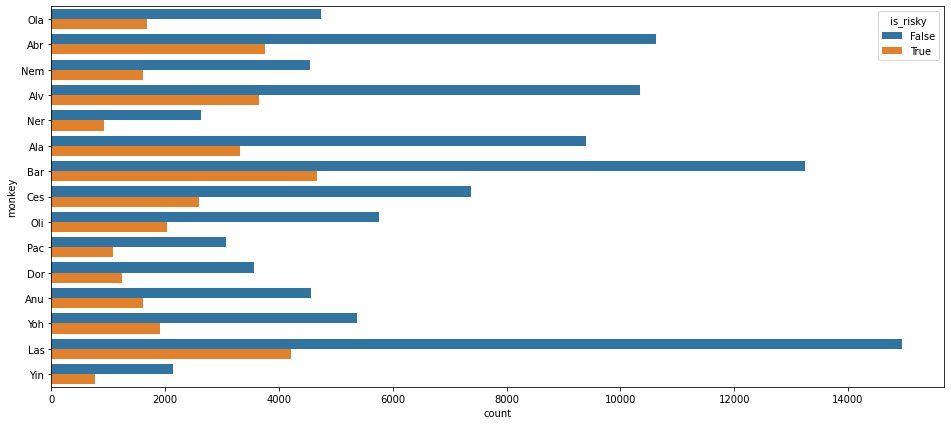

In [14]:
fig, ax = plt.subplots(figsize=(16, 7))
sns.countplot(y="monkey", hue="is_risky", data=df_bhv, ax=ax)
plt.show()

# Fit

## Optimization technique

In [15]:
EPS = np.finfo(float).eps

def objective(param, model, data):
    # Since we will look for the minimum, 
    # let's return -LLS instead of LLS

    inst = model(param=param)

    n = len(data)
    ll = np.zeros(n)

    for i, (_, row) in enumerate(data.iterrows()):
        pi = inst.p_choice(**row)
        ll[i] = np.log(pi + EPS)

    return -ll.sum()

def optimize(model, data):

    # Define an init guess
    init_guess = [(b[1] - b[0])/2 for b in model.fit_bounds]

    # Run the optimizer
    res = scipy.optimize.minimize(
        fun=objective,
        x0=init_guess,
        bounds=model.fit_bounds,
        args=(model, data))

    # Make sure that the optimizer ended up with success
    assert res.success

    # Get the best param and best value from the 
    best_param = res.x
    best_value = res.fun

    return best_param, best_value

## Decision-making model

In [16]:
class Model:
    
    param_labels = ['distortion', 'precision', 'risk_aversion']
    fit_bounds = [(0.2, 1.8), (0.1, 10.0), (-0.99, 0.99)]

    def __init__(self, param):
        self.distortion, self.precision, self.risk_aversion = param
    
    def p_choice(self, p0, x0, p1, x1, c, *args, **kwargs):

        p = self.p(p0=p0, x0=x0, p1=p1, x1=x1)
        return p[c]

    @classmethod
    def softmax(cls, v, precision):
        return expit(v/precision)

    @staticmethod
    def u(x, risk_aversion):
        if isinstance(x, np.ndarray):
            raise Exception
        else:
            if x >= 0:
                return x ** (1-risk_aversion)
            else:
                return - np.abs(x) ** (1 + risk_aversion)
    
    @classmethod
    def pi(cls, p, alpha):
        if isinstance(p, np.ndarray):
            to_return = np.zeros(p.shape)
            unq_zero = p != 0
            to_return[unq_zero] = np.exp(-(-np.log(p)) ** alpha)
            return to_return
        else:
            if p == 0:
                return 0
            else:
                return np.exp(-(-np.log(p)) ** alpha)

    def p(self, p0, x0, p1, x1):

        v0 = self.pi(p0, self.distortion) * self.u(x0, self.risk_aversion)
        v1 = self.pi(p1, self.distortion) * self.u(x1, self.risk_aversion)
        p = np.zeros(2)
        p[0] = self.softmax(v0-v1, self.precision)
        p[1] = 1 - p[0]
        return p

## Trial with Bar

In [17]:
m = "Bar"
cd = "gain" 

# Select the date
df_m = df_bhv[(df_bhv.monkey == m) & (df_bhv.is_risky == True) & (df_bhv[f"is_{cd}"] == True)]

# Drop columns with identical values
nunique = df_m.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
df_m.drop(cols_to_drop, axis=1)

df_m

monkey       date  c    p0  x0    p1  x1  time_response  left_X  \
618       Bar 2020-06-25  1  0.25   3  0.75   1            666  1195.0   
628       Bar 2020-06-25  1  0.25   3  0.50   2            655  1195.0   
642       Bar 2020-06-25  1  1.00   1  0.75   3            845  1195.0   
672       Bar 2020-06-25  1  0.50   3  0.75   2           1374   469.0   
697       Bar 2020-06-25  1  0.75   1  0.50   2           1094   469.0   
...       ...        ... ..   ...  ..   ...  ..            ...     ...   
137103    Bar 2020-10-25  1  1.00   1  0.50   2            584   469.0   
137117    Bar 2020-10-25  1  1.00   1  0.25   2            635   469.0   
137122    Bar 2020-10-25  0  0.50   3  0.75   1            701   469.0   
137127    Bar 2020-10-25  1  0.25   3  0.50   1            577  1195.0   
137141    Bar 2020-10-25  0  0.50   3  0.75   1            624   469.0   

        left_Y  ...  is_same_x  is_best_left  is_best_right  pair_id  \
618      131.0  ...      False         False          False       88   
628      131.0  ...      False         False          False       43   
642      131.0  ...      False         False          False       15   
672      131.0  ...      False         False          False       81   
697      131.0  ...      False         False          False       12   
...        ...  ...        ...           ...            ...      ...   
137103   131.0  ...      False         False          False       29   
137117   131.0  ...      False         False          False       99   
137122   131.0  ...      False         False          False       23   
137127   131.0  ...      False         False          False       95   
137141   131.0  ...      False         False          False       23   

        is_control  is_risky  is_neither_risky_nor_control  is_reversed  \
618          False      True                         False        False   
628          False      True                         False        False   
642          False      True                         False         True   
672          False      True                         False        False   
697          False      True                         False         True   
...            ...       ...                           ...          ...   
137103       False      True                         False         True   
137117       False      True                         False         True   
137122       False      True                         False        False   
137127       False      True                         False        False   
137141       False      True                         False        False   

        choose_risky  choose_best  
618            False        False  
628            False        False  
642             True        False  
672            False        False  
697             True        False  
...              ...          ...  
137103          True        False  
137117          True        False  
137122          True        False  
137127         False        False  
137141          True        False  

[2335 rows x 28 columns]

Fit all the data at once...

In [18]:
best_param, best_value = optimize(model=Model, data=df_m)
print("best_param", best_param)

best_param [ 0.72158801  0.72756233 -0.20691704]


Fit the data day by day...

In [19]:
dates = df_m.date.unique()
n_days = len(dates)
n_param = len(Model.param_labels)

r = np.zeros((n_days, n_param))
for i in tqdm(range(n_days), file=sys.stdout):
    best_param, best_value = optimize(model=Model, data=df_m[df_m.date == dates[i]])
    r[i] = best_param

df_p = pd.DataFrame(r, index=dates, columns=Model.param_labels)
df_p

100%|██████████| 113/113 [01:03<00:00,  1.78it/s]


distortion  precision  risk_aversion
2020-06-25    0.831553   1.281043      -0.295716
2020-06-26    0.930450   1.079990      -0.067519
2020-06-27    0.869438   0.615553       0.111349
2020-06-28    0.935447   0.585639      -0.097054
2020-06-29    0.744479   0.490433      -0.255992
...                ...        ...            ...
2020-10-21    0.618826   0.223102       0.466522
2020-10-22    0.606719   0.100000      -0.135914
2020-10-23    1.261552   0.100000      -0.289819
2020-10-24    0.309839   0.251927       0.398676
2020-10-25    1.800000   0.689228      -0.197721

[113 rows x 3 columns]

In [20]:
df_elo_m = df_elo[m.lower()]
df_elo_m = df_elo_m[df_elo_m.index >= min(dates)]
df_elo_m

date
2020-06-25     999
2020-06-26     991
2020-06-27     977
2020-06-28     948
2020-06-29     966
              ... 
2020-10-21    1083
2020-10-22    1070
2020-10-23    1072
2020-10-24    1062
2020-10-25    1062
Name: bar, Length: 123, dtype: int64

### Plot

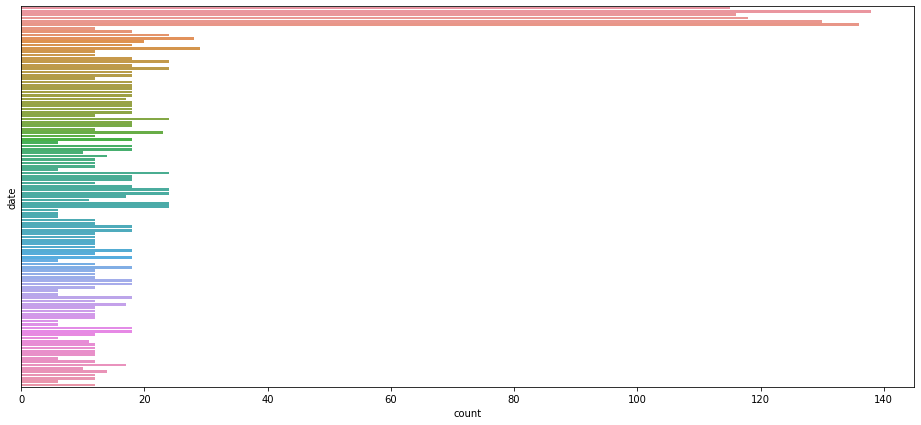

In [21]:
fig, ax = plt.subplots(figsize=(16, 7))
sns.countplot(y="date", data=df_m, ax=ax)
ax.set_yticks([])
plt.show()

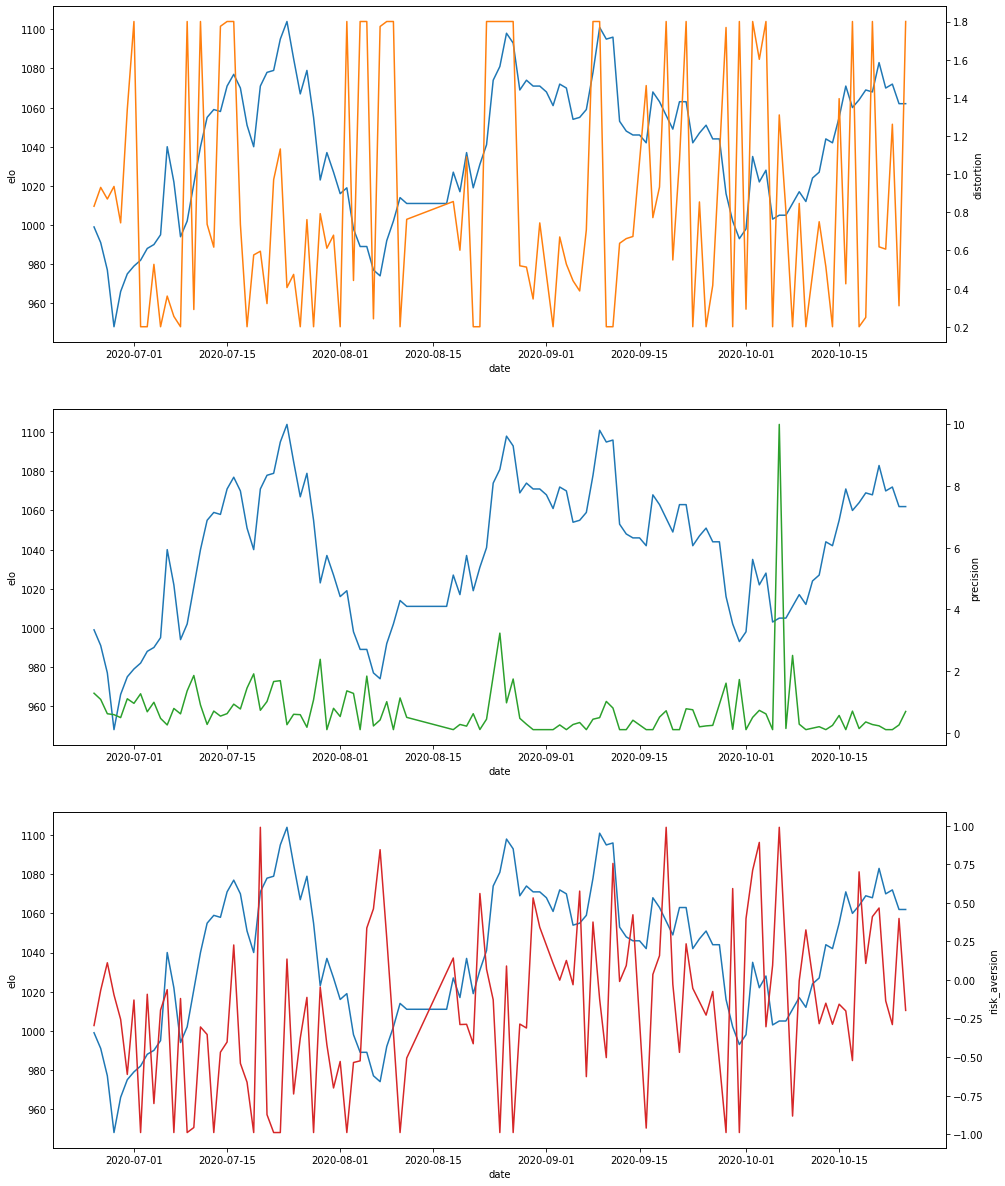

In [22]:
fig, axes = plt.subplots(figsize=(16, 7*n_param), nrows=n_param)
colors = [f"C{i}" for i in range(1, n_param+1)]
for i in range(n_param):
    
    ax = axes[i]
    param= Model.param_labels[i]
    color = colors[i]
    
    sns.lineplot(data=df_elo_m, ax=ax)
    ax.set_ylabel("elo")
    ax_tw = ax.twinx()
    sns.lineplot(x=dates, y=param, data=df_p, ax=ax_tw, color=color)

plt.show()

## Day by day: With all the monkeys...

### Get the data

In [23]:
df_fit_day = pd.DataFrame()

cond = ("is_gain", "is_loss")
monkeys = df_bhv.monkey.unique()

for i_m, m in enumerate(monkeys):

    print(f"monkey {i_m+1}/{len(monkeys)}")

    for cd in cond:
        
        # Select the data
        df_m = df_bhv[(df_bhv.monkey == m) & (df_bhv.is_risky == True) & (df_bhv[cd] == True)]
        
        # Get the dates
        dates = df_m.date.unique()
        n_days = len(dates)
        
        # Get the number of parameters
        n_param = len(Model.param_labels)
        
        # Optimize for each day separately
        r = np.zeros((n_days, n_param))
        for i in tqdm(range(n_days), file=sys.stdout):
            best_param, best_value = optimize(model=Model, data=df_m[df_m.date == dates[i]])
            r[i] = best_param
        
        # Backup
        df_m_cd = pd.DataFrame(r, columns=Model.param_labels)
        df_m_cd["date"] = dates
        df_m_cd["monkey"] = m
        df_m_cd["condition"] = cd.replace("is_", "")
        df_fit_day = pd.concat((df_fit_day, df_m_cd))

df_fit_day.to_csv(os.path.join(BACKUP_FOLDER, "df_fit_day.csv"), index=False)

monkey 1/15
100%|██████████| 86/86 [00:20<00:00,  4.30it/s]
monkey 2/15
100%|██████████| 103/103 [00:57<00:00,  1.78it/s]
monkey 3/15
100%|██████████| 60/60 [00:26<00:00,  2.31it/s]
monkey 4/15
100%|██████████| 113/113 [00:55<00:00,  2.04it/s]
monkey 5/15
100%|██████████| 66/66 [00:10<00:00,  6.44it/s]
monkey 6/15
100%|██████████| 111/111 [00:48<00:00,  2.28it/s]
monkey 7/15
100%|██████████| 113/113 [01:15<00:00,  1.49it/s]
monkey 8/15
100%|██████████| 106/106 [00:39<00:00,  2.68it/s]
monkey 9/15
100%|██████████| 98/98 [00:29<00:00,  3.38it/s]
monkey 10/15
100%|██████████| 73/73 [00:13<00:00,  5.44it/s]
monkey 11/15
100%|██████████| 89/89 [00:16<00:00,  5.33it/s]
monkey 12/15
100%|██████████| 80/80 [00:21<00:00,  3.78it/s]
monkey 13/15
100%|██████████| 70/70 [00:24<00:00,  2.82it/s]
monkey 14/15
100%|██████████| 78/78 [00:47<00:00,  1.63it/s]
monkey 15/15
100%|██████████| 62/62 [00:08<00:00,  7.58it/s]


### Plot

In [24]:
df_fit_day = pd.read_csv(os.path.join(BACKUP_FOLDER, "df_fit_day.csv"))
df_fit_day.date = pd.to_datetime(df_fit_day.date)
df_fit_day

distortion  precision  risk_aversion       date monkey condition
0       0.200000  10.000000       0.990000 2020-06-25    Ola      gain
1       1.800000   2.298505       0.095405 2020-06-26    Ola      gain
2       1.800000   0.641667       0.929759 2020-06-27    Ola      gain
3       0.200000   0.487869       0.004734 2020-06-28    Ola      gain
4       1.192238   0.917417      -0.192953 2020-06-29    Ola      gain
...          ...        ...            ...        ...    ...       ...
2607    0.200000  10.000000       0.990000 2020-10-20    Yin      loss
2608    0.200000   1.038210      -0.879448 2020-10-21    Yin      loss
2609    0.784174   0.100000      -0.990000 2020-10-22    Yin      loss
2610    1.800000   1.078414       0.873188 2020-10-24    Yin      loss
2611    0.200000  10.000000      -0.990000 2020-10-25    Yin      loss

[2612 rows x 6 columns]

In [25]:
df_elo = pd.read_csv(os.path.join(BACKUP_FOLDER, "df_elo.csv"), index_col=0)
df_elo.index = pd.to_datetime(df_elo.index)
df_elo

nem   yak   ner   yoh   nen   wot   pac  las   anu   ola  ...  \
date                                                                   ...   
2016-10-25  1024  1009  1018   984   991  1010   991  982   991  1000  ...   
2016-10-26  1032  1009  1018  1003   991  1010   982  964   991   999  ...   
2016-10-27  1032  1009  1018  1003   991  1010   982  956   991   999  ...   
2016-10-28  1041  1009  1018  1003   991  1010   982  956   991   999  ...   
2016-10-29  1063  1009  1018  1011   991  1010   975  941   984  1008  ...   
...          ...   ...   ...   ...   ...   ...   ...  ...   ...   ...  ...   
2020-10-21   938  1243   961   840  1018  1234  1379  713  1117  1287  ...   
2020-10-22   970  1243   962   840  1018  1234  1347  716  1105  1296  ...   
2020-10-23   971  1243   970   840  1018  1234  1347  735  1105  1296  ...   
2020-10-24   971  1243   981   840  1018  1234  1352  731  1105  1291  ...   
2020-10-25   974  1243   992   840  1018  1234  1357  724  1105  1296  ...   

             olg   jea   pat   bar   ces   lad   ber   dor   eri   fic  
date                                                                    
2016-10-25  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
2016-10-26  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
2016-10-27  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
2016-10-28  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
2016-10-29  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
2020-10-21   933   760   841  1083   837   753   743   766   702   579  
2020-10-22   935   755   841  1070   832   753   743   795   702   566  
2020-10-23   920   751   841  1072   838   753   758   773   668   566  
2020-10-24   923   750   841  1062   822   753   758   781   666   580  
2020-10-25   908   740   841  1062   807   753   763   787   675   575  

[1462 rows x 27 columns]

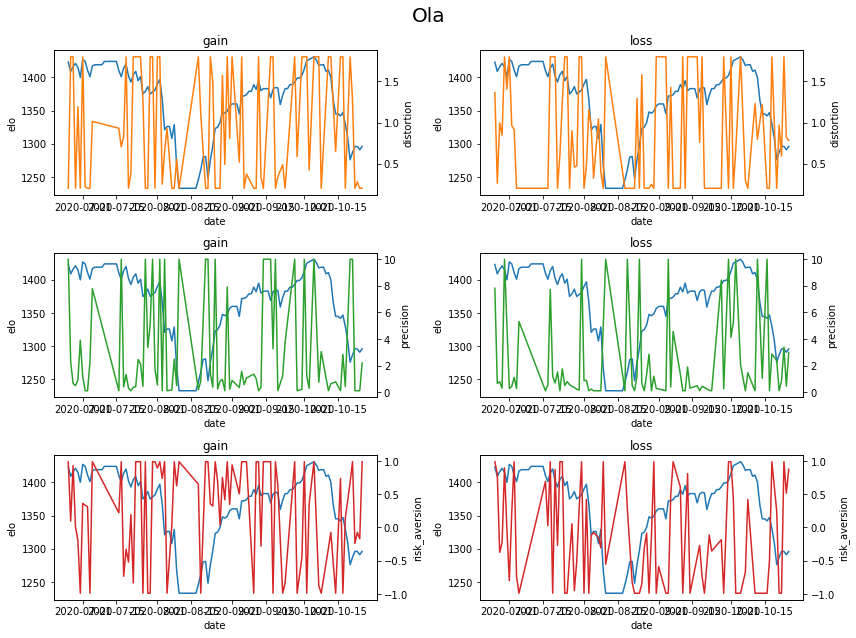

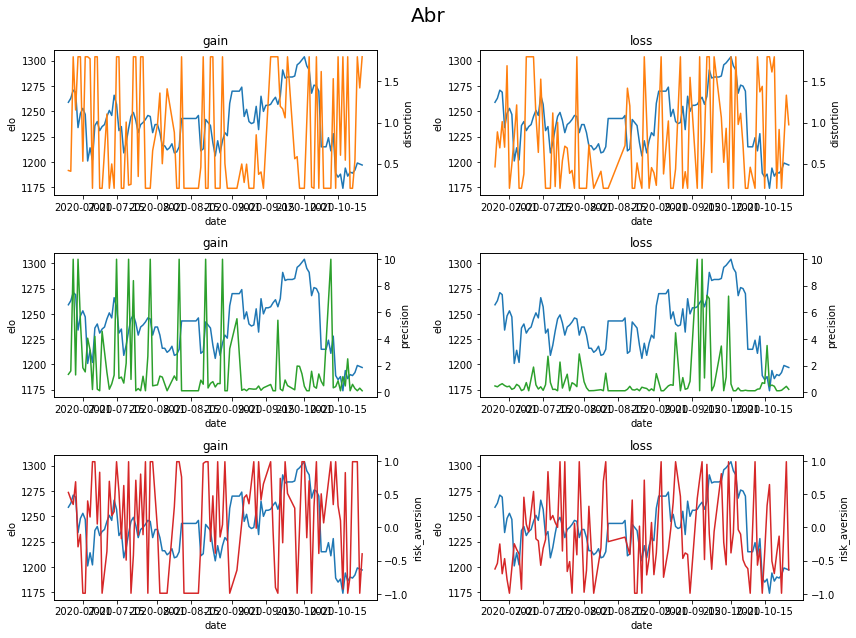

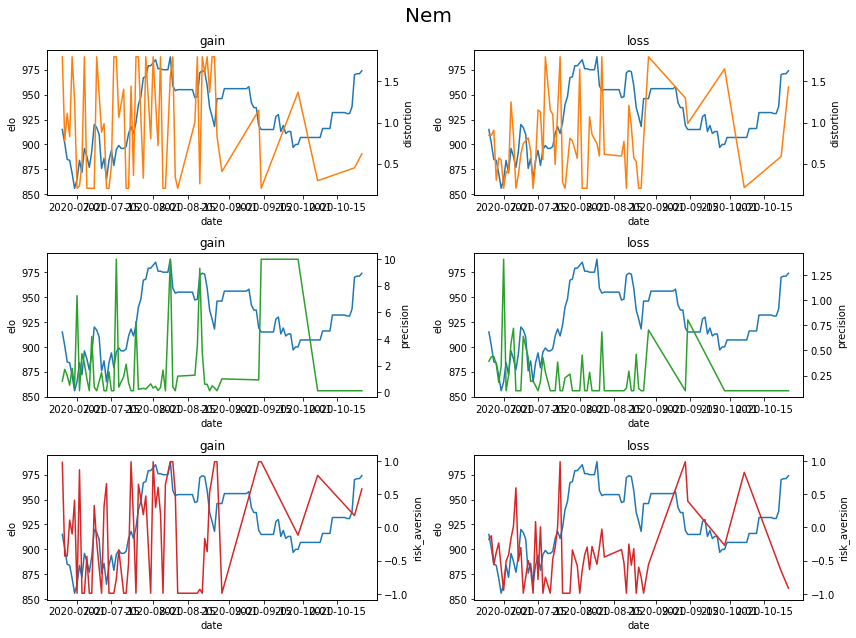

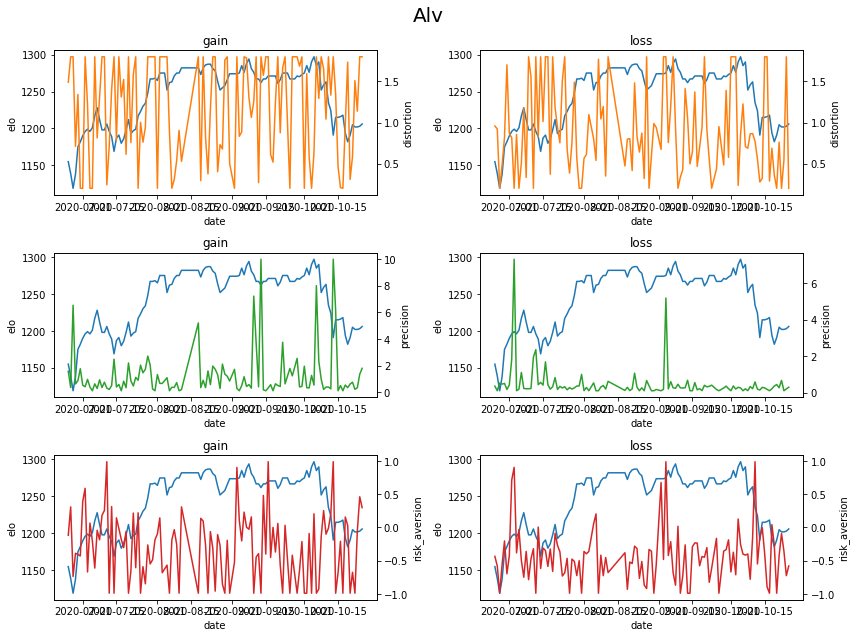

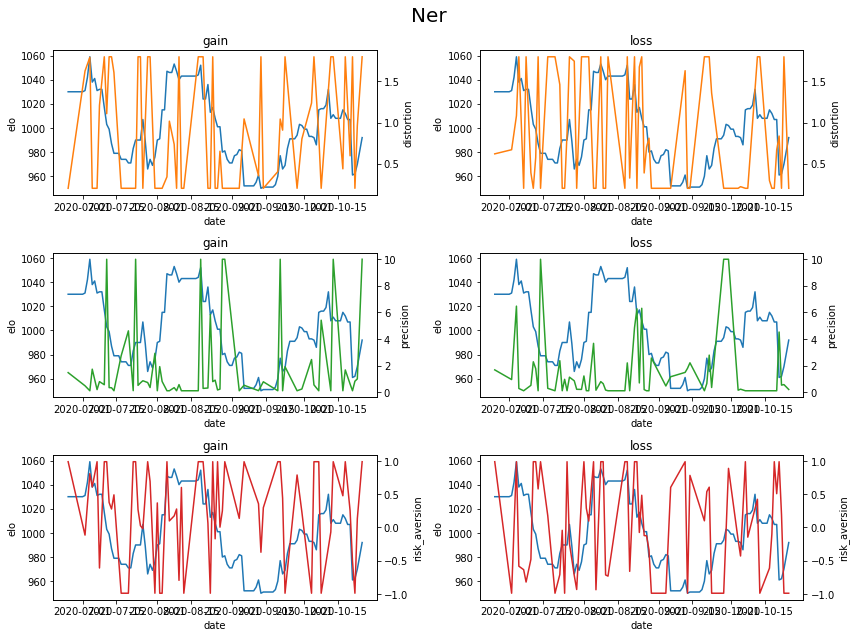

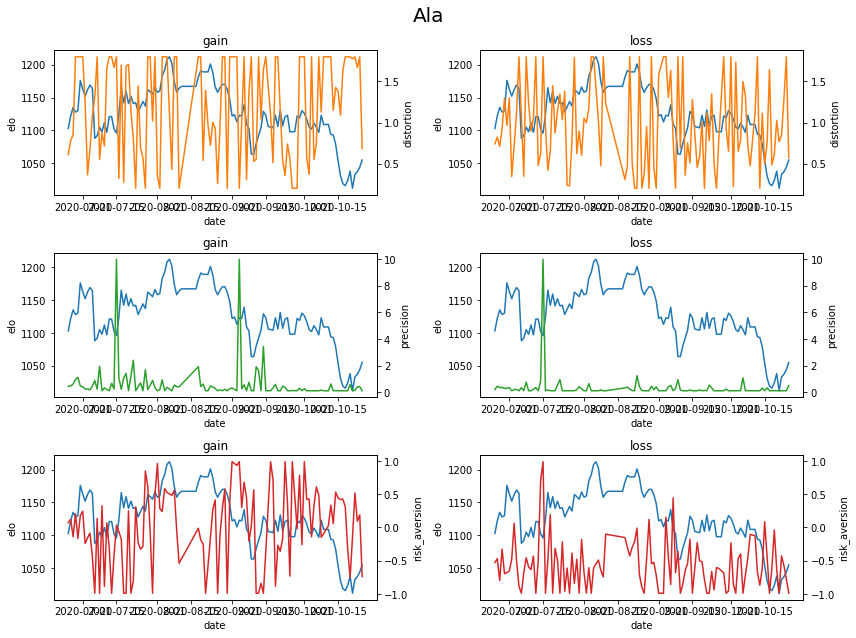

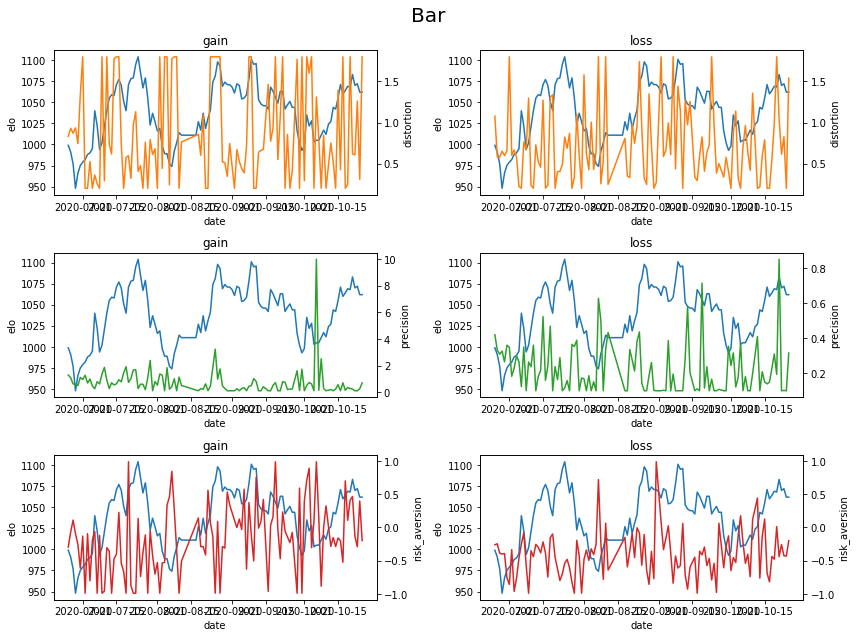

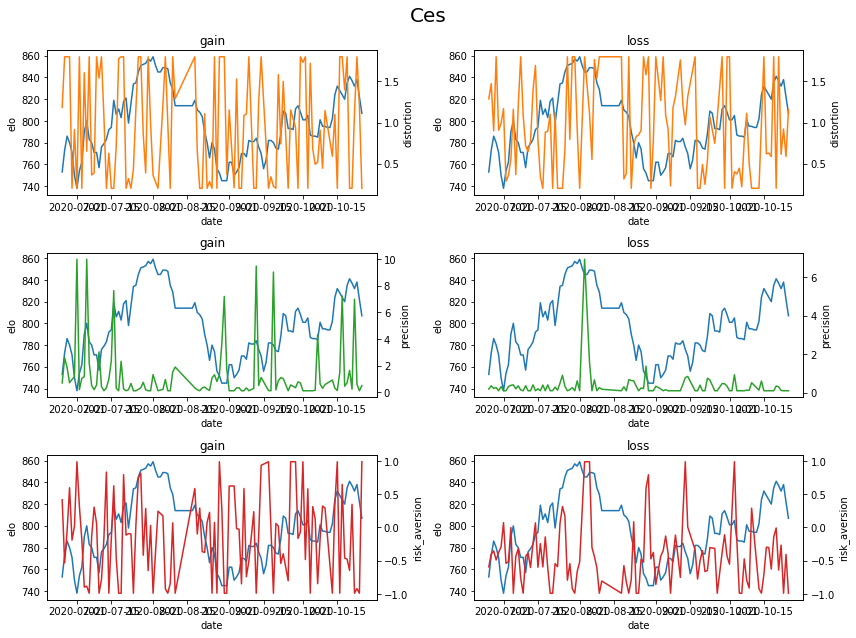

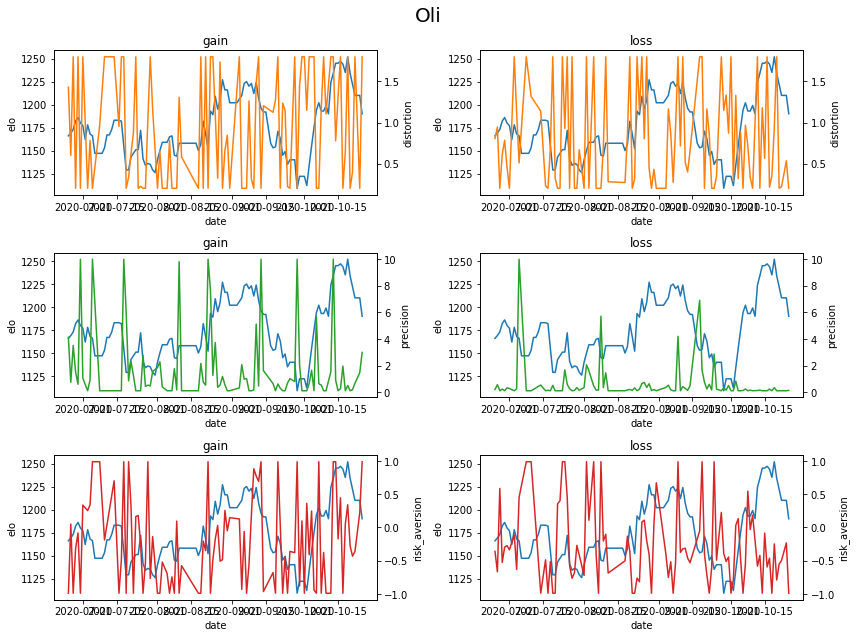

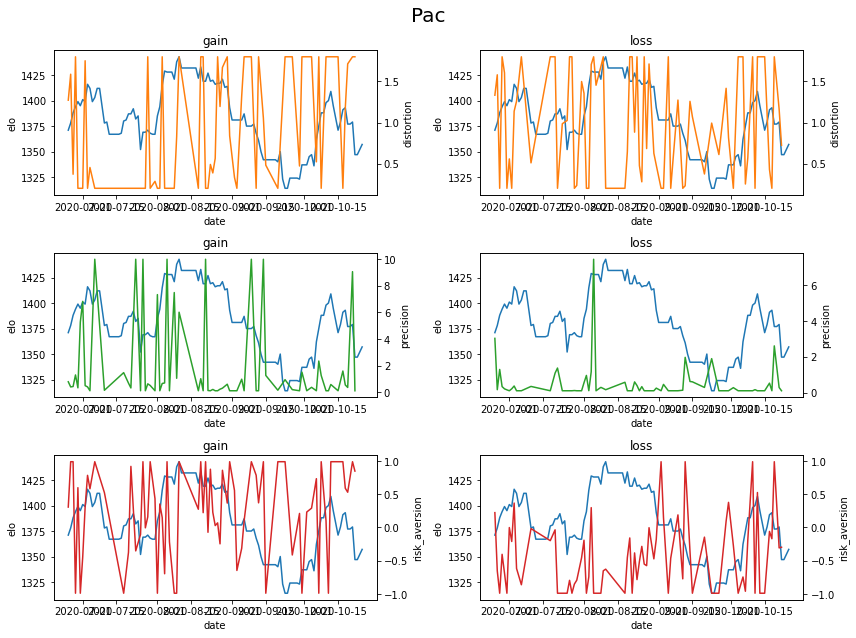

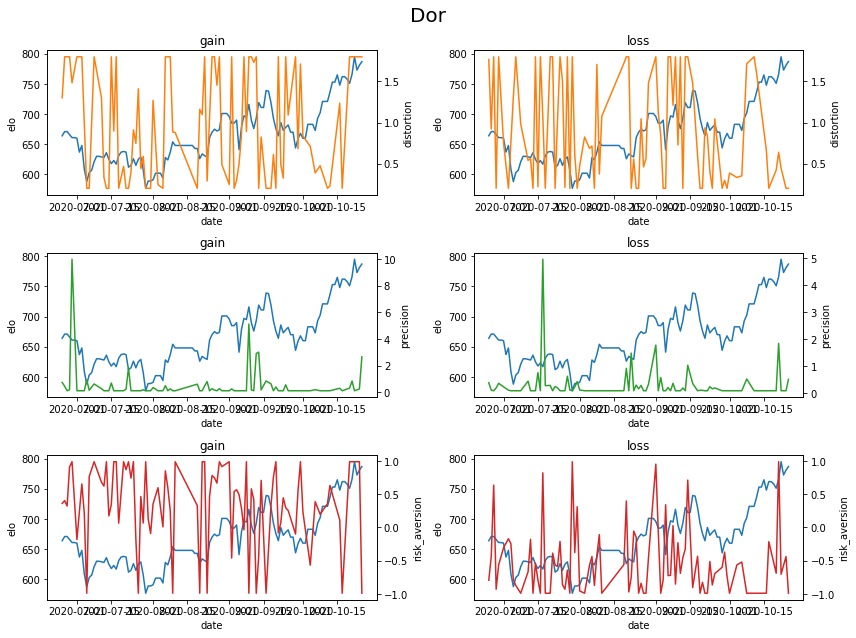

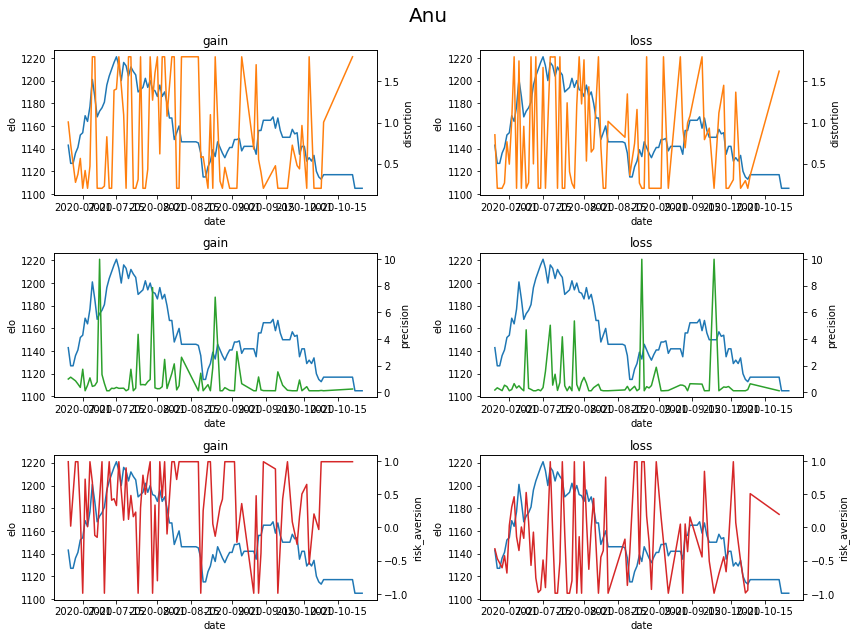

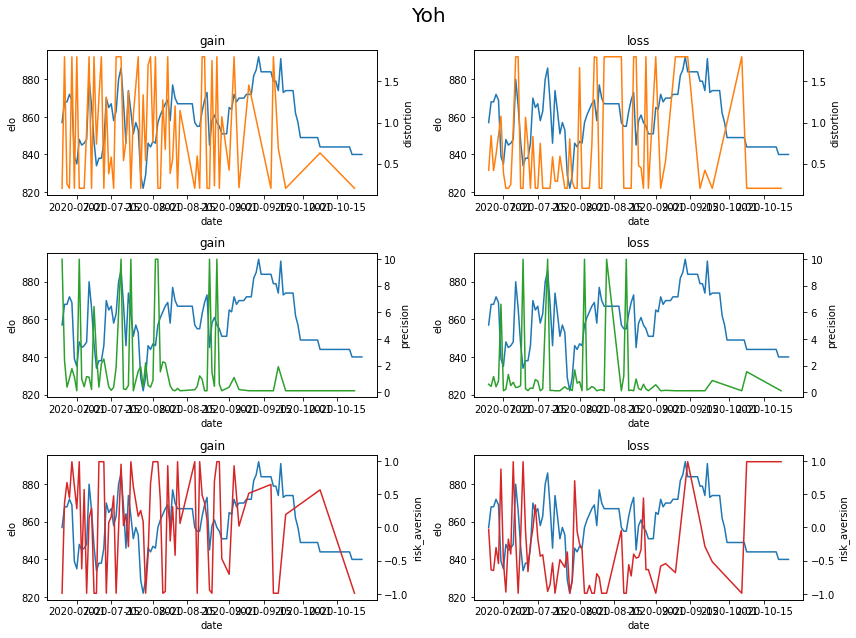

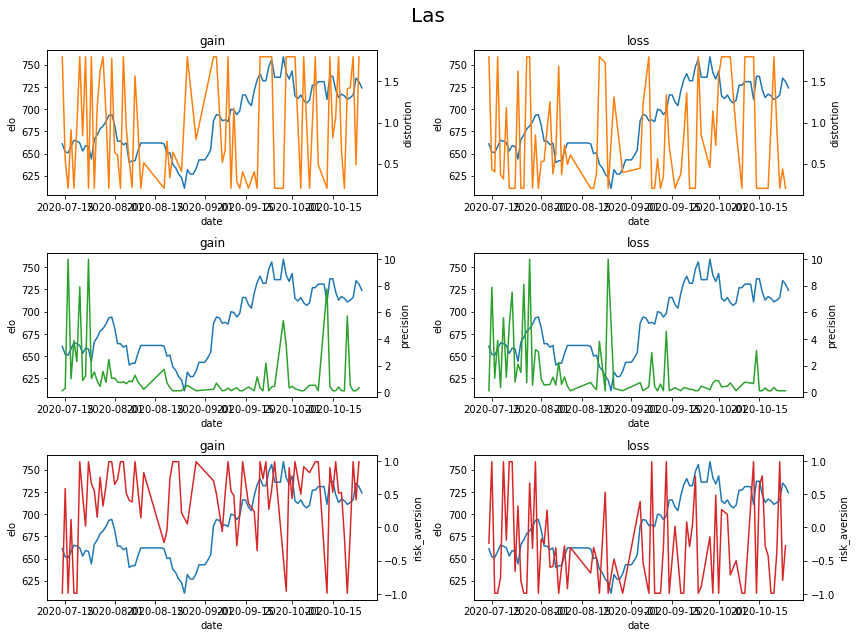

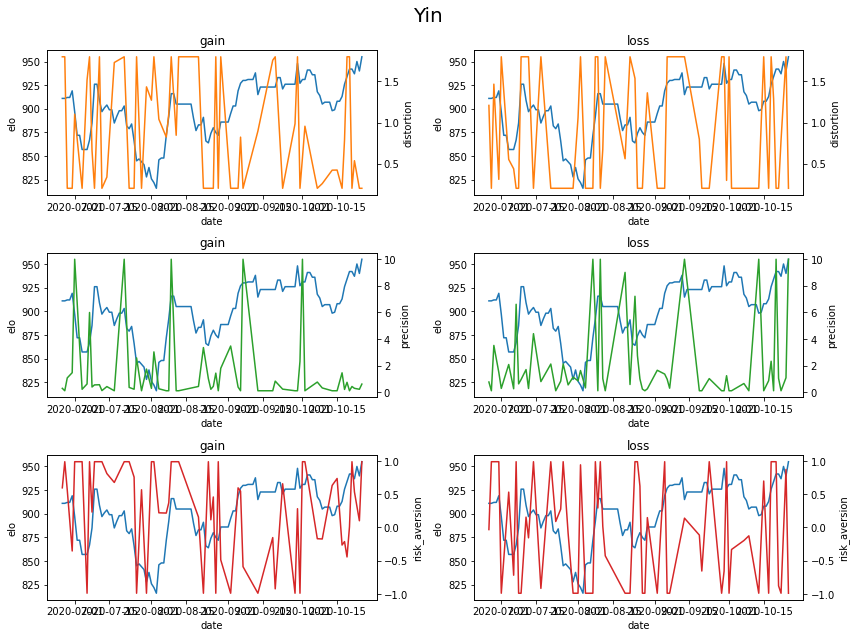

In [26]:
cond = df_fit_day.condition.unique()

for i, m in enumerate(monkeys):
    
    fig, axes = plt.subplots(figsize=(12, 3*n_param), nrows=n_param, ncols=2)
    fig.suptitle(m, fontsize=20)
    colors = [f"C{k}" for k in range(1, n_param+1)]
    
    for j, cd in enumerate(cond):
        
        df_p = df_fit_day[(df_fit_day.monkey == m) & (df_fit_day.condition == cd)]
        
        df_elo_m = df_elo[m.lower()]
        df_elo_m = df_elo_m[df_elo_m.index >= min(df_p.date)]
        
        for k in range(n_param):

            ax = axes[k, j]
            ax.set_title(cd.replace("is_", ""))
            param = Model.param_labels[k]
            color = colors[k]

            sns.lineplot(data=df_elo_m, ax=ax)
            ax.set_ylabel("elo")
            ax_tw = ax.twinx()
            sns.lineplot(x=df_p.date, y=param, data=df_p, ax=ax_tw, color=color)
    plt.tight_layout()
    plt.show()

## Using a sliding window: Trial with Bar

### Get the data

In [27]:
cd = "is_gain"
m = "Bar"

# Get the data
df_m = df_bhv[(df_bhv.monkey == m) & (df_bhv.is_risky == True) & (df_bhv[cd] == True)]

# Drop columns with identical values
nunique = df_m.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
df_m.drop(cols_to_drop, axis=1)

# Get the dates
dates = df_m.date.unique()
n_days = len(dates)

In [28]:
n_param = len(Model.param_labels)
w = 5

r = np.zeros((n_days, n_param))
for i in tqdm(range(n_days), file=sys.stdout):
    
    # Apply mask for dates
    b0 = dates[max(i-(w-1), 0)]
    b1 = dates[min(i+w, n_days-1)]
    mask = (df_m.date >= b0) & (df_m.date <= b1)
    
    # Optimize
    best_param, best_value = optimize(model=Model, data=df_m[mask])
    r[i] = best_param

df_m_cd = pd.DataFrame(r, index=dates, columns=Model.param_labels)
df_m_cd

100%|██████████| 113/113 [08:27<00:00,  4.49s/it]


distortion  precision  risk_aversion
2020-06-25    0.928452   0.826746      -0.201538
2020-06-26    0.945851   0.838766      -0.204449
2020-06-27    0.933943   0.881863      -0.234254
2020-06-28    0.903873   0.885684      -0.234505
2020-06-29    0.884928   0.883117      -0.254085
...                ...        ...            ...
2020-10-21    0.748084   0.365531       0.145037
2020-10-22    0.690840   0.336619       0.157052
2020-10-23    0.666158   0.348117       0.109329
2020-10-24    0.781546   0.350297       0.137144
2020-10-25    1.573499   0.796256       0.122376

[113 rows x 3 columns]

In [29]:
df_elo_m = df_elo[m.lower()]
df_elo_m = df_elo_m[df_elo_m.index >= min(df_m_cd.index)]
df_elo_m

date
2020-06-25     999
2020-06-26     991
2020-06-27     977
2020-06-28     948
2020-06-29     966
              ... 
2020-10-21    1083
2020-10-22    1070
2020-10-23    1072
2020-10-24    1062
2020-10-25    1062
Name: bar, Length: 123, dtype: int64

### Plot

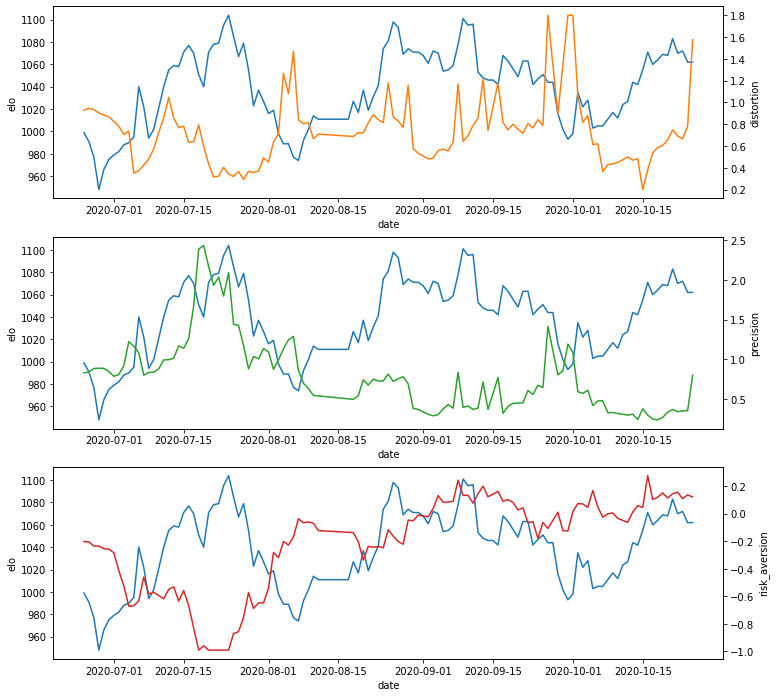

In [30]:
fig, axes = plt.subplots(figsize=(12, 4*n_param), nrows=n_param)
colors = [f"C{i}" for i in range(1, n_param+1)]
for i in range(n_param):
    
    ax = axes[i]
    param= Model.param_labels[i]
    color = colors[i]
    
    sns.lineplot(data=df_elo_m, ax=ax)
    ax.set_ylabel("elo")
    ax_tw = ax.twinx()
    sns.lineplot(x=df_m_cd.index, y=param, data=df_m_cd, ax=ax_tw, color=color)

plt.show()

## Using a slide window: With all the monkeys

### Get the data

In [31]:
df_fit = pd.DataFrame()

cond = ("is_gain", "is_loss")
w = 5

for i_m, m in enumerate(monkeys):

    print(f"monkey {i_m+1}/{len(monkeys)}")

    for cd in cond:
        
        # Get data
        df_m = df_bhv[(df_bhv.monkey == m) & (df_bhv.is_risky == True) & (df_bhv[cd] == True)]
        
        # Get dates
        dates = df_m.date.unique()
        n_days = len(dates)
        n_param = len(Model.param_labels)
        
        # Optimize for each 'windowed' day
        r = np.zeros((n_days, n_param))
        for i in tqdm(range(n_days), file=sys.stdout):
            
            # Get the mask
            b0 = dates[max(i-(w-1), 0)]
            b1 = dates[min(i+w, n_days-1)]
            mask = (df_m.date >= b0) & (df_m.date <= b1)
            
            # Optimize
            best_param, best_value = optimize(model=Model, data=df_m[mask])
            r[i] = best_param
        
        # Backup
        df_m_cd = pd.DataFrame(r, columns=Model.param_labels)
        df_m_cd["date"] = dates
        df_m_cd["monkey"] = m
        df_m_cd["condition"] = cd.replace("is_", "")
        df_fit = pd.concat((df_fit, df_m_cd))

df_fit.to_csv(os.path.join(BACKUP_FOLDER, "df_fit.csv"))

monkey 1/15
100%|██████████| 86/86 [02:16<00:00,  1.59s/it]
monkey 2/15
100%|██████████| 103/103 [08:16<00:00,  4.82s/it]
monkey 3/15
100%|██████████| 60/60 [03:57<00:00,  3.96s/it]
monkey 4/15
100%|██████████| 113/113 [09:33<00:00,  5.08s/it]
monkey 5/15
100%|██████████| 66/66 [01:34<00:00,  1.43s/it]
monkey 6/15
100%|██████████| 111/111 [07:50<00:00,  4.24s/it]
monkey 7/15
100%|██████████| 113/113 [12:02<00:00,  6.39s/it]
monkey 8/15
100%|██████████| 106/106 [06:39<00:00,  3.77s/it]
monkey 9/15
100%|██████████| 98/98 [05:03<00:00,  3.10s/it]
monkey 10/15
100%|██████████| 73/73 [02:34<00:00,  2.11s/it]
monkey 11/15
100%|██████████| 89/89 [02:59<00:00,  2.01s/it]
monkey 12/15
100%|██████████| 80/80 [03:37<00:00,  2.71s/it]
monkey 13/15
100%|██████████| 70/70 [04:07<00:00,  3.53s/it]
monkey 14/15
100%|██████████| 78/78 [08:32<00:00,  6.57s/it]
monkey 15/15
100%|██████████| 62/62 [00:45<00:00,  1.36it/s]


### Plot

In [35]:
df_fit = pd.read_csv(os.path.join(BACKUP_FOLDER, "df_fit.csv"))
df_fit.date = pd.to_datetime(df_fit.date)
df_fit

Unnamed: 0  distortion  precision  risk_aversion       date monkey  \
0              0    0.200000  10.000000      -0.552074 2020-06-25    Ola   
1              1    0.200000  10.000000      -0.512254 2020-06-26    Ola   
2              2    0.200000   2.727403       0.439623 2020-06-27    Ola   
3              3    0.200000   2.122734       0.514584 2020-06-28    Ola   
4              4    0.200000   2.723621       0.321982 2020-06-29    Ola   
...          ...         ...        ...            ...        ...    ...   
2607          57    1.343875   7.899244       0.990000 2020-10-20    Yin   
2608          58    1.278380   9.770808       0.990000 2020-10-21    Yin   
2609          59    1.353748   5.161971       0.990000 2020-10-22    Yin   
2610          60    0.940235   6.624522       0.990000 2020-10-24    Yin   
2611          61    1.027681   2.301268      -0.990000 2020-10-25    Yin   

     condition  
0         gain  
1         gain  
2         gain  
3         gain  
4         gain  
...        ...  
2607      loss  
2608      loss  
2609      loss  
2610      loss  
2611      loss  

[2612 rows x 7 columns]

In [36]:
df_elo = pd.read_csv(os.path.join(BACKUP_FOLDER, "df_elo.csv"), index_col=0)
df_elo.index = pd.to_datetime(df_elo.index)
df_elo

nem   yak   ner   yoh   nen   wot   pac  las   anu   ola  ...  \
date                                                                   ...   
2016-10-25  1024  1009  1018   984   991  1010   991  982   991  1000  ...   
2016-10-26  1032  1009  1018  1003   991  1010   982  964   991   999  ...   
2016-10-27  1032  1009  1018  1003   991  1010   982  956   991   999  ...   
2016-10-28  1041  1009  1018  1003   991  1010   982  956   991   999  ...   
2016-10-29  1063  1009  1018  1011   991  1010   975  941   984  1008  ...   
...          ...   ...   ...   ...   ...   ...   ...  ...   ...   ...  ...   
2020-10-21   938  1243   961   840  1018  1234  1379  713  1117  1287  ...   
2020-10-22   970  1243   962   840  1018  1234  1347  716  1105  1296  ...   
2020-10-23   971  1243   970   840  1018  1234  1347  735  1105  1296  ...   
2020-10-24   971  1243   981   840  1018  1234  1352  731  1105  1291  ...   
2020-10-25   974  1243   992   840  1018  1234  1357  724  1105  1296  ...   

             olg   jea   pat   bar   ces   lad   ber   dor   eri   fic  
date                                                                    
2016-10-25  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
2016-10-26  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
2016-10-27  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
2016-10-28  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
2016-10-29  1000  1000  1000  1000  1000  1000  1000  1000  1000  1000  
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
2020-10-21   933   760   841  1083   837   753   743   766   702   579  
2020-10-22   935   755   841  1070   832   753   743   795   702   566  
2020-10-23   920   751   841  1072   838   753   758   773   668   566  
2020-10-24   923   750   841  1062   822   753   758   781   666   580  
2020-10-25   908   740   841  1062   807   753   763   787   675   575  

[1462 rows x 27 columns]

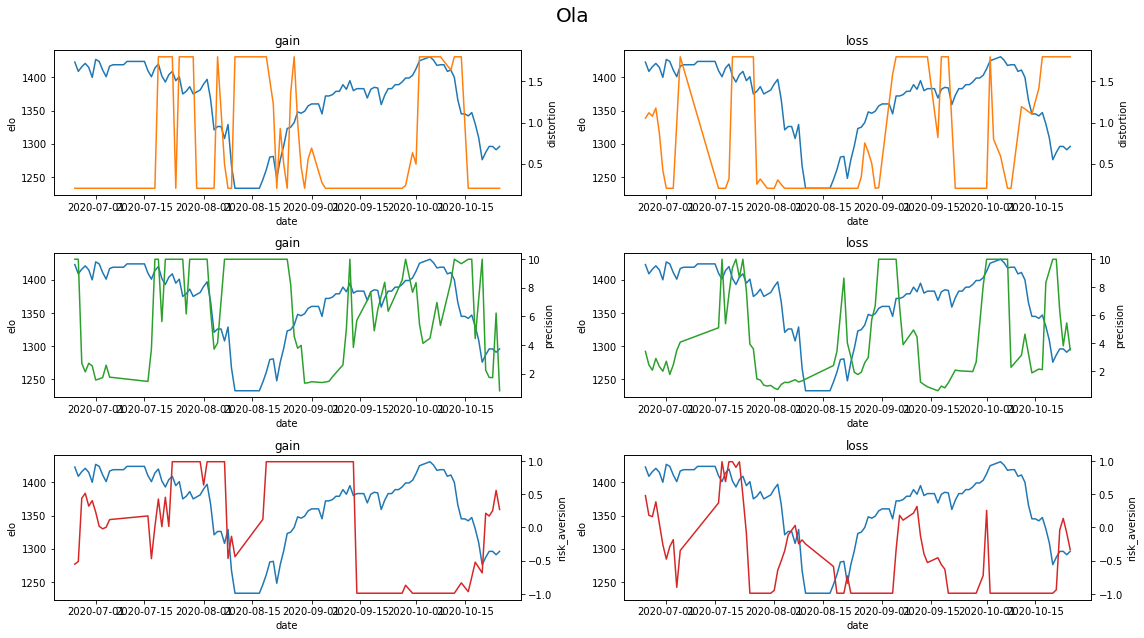

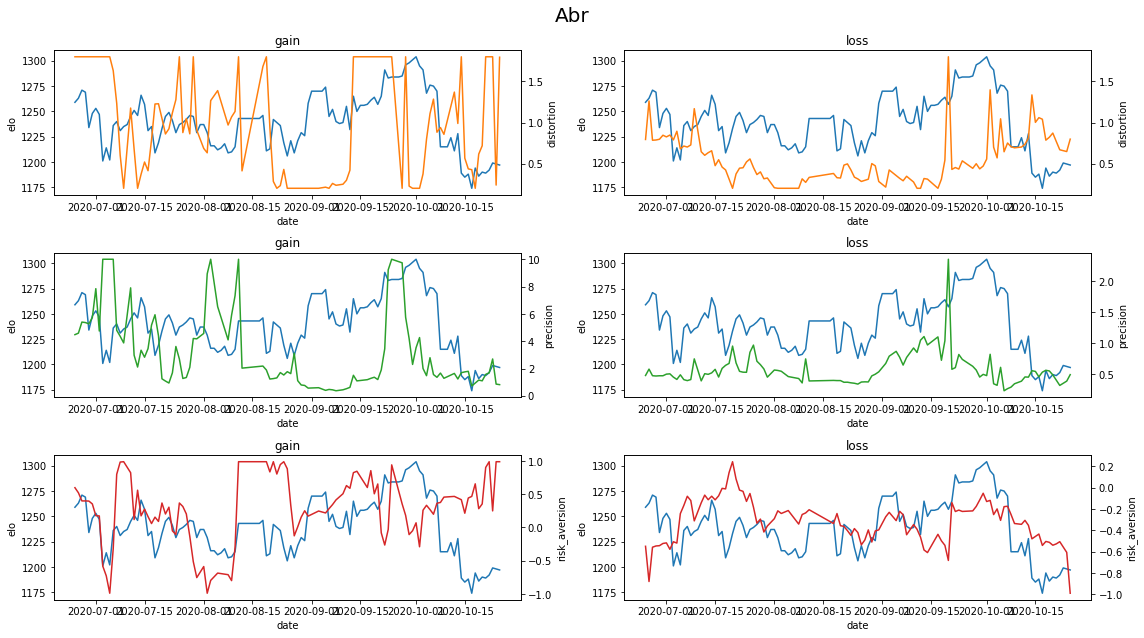

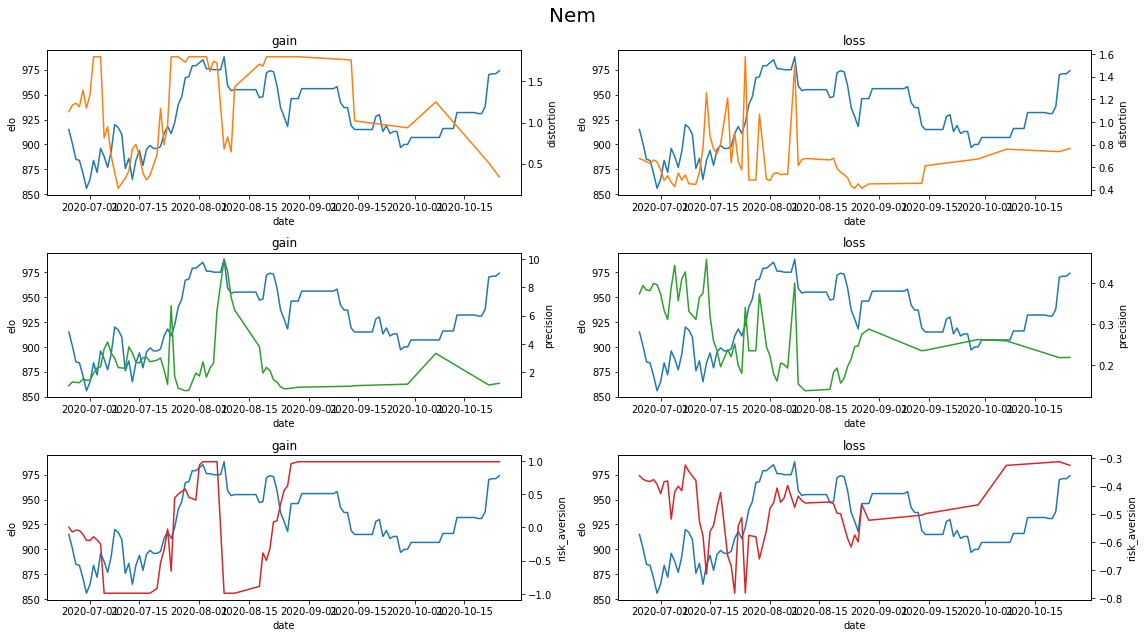

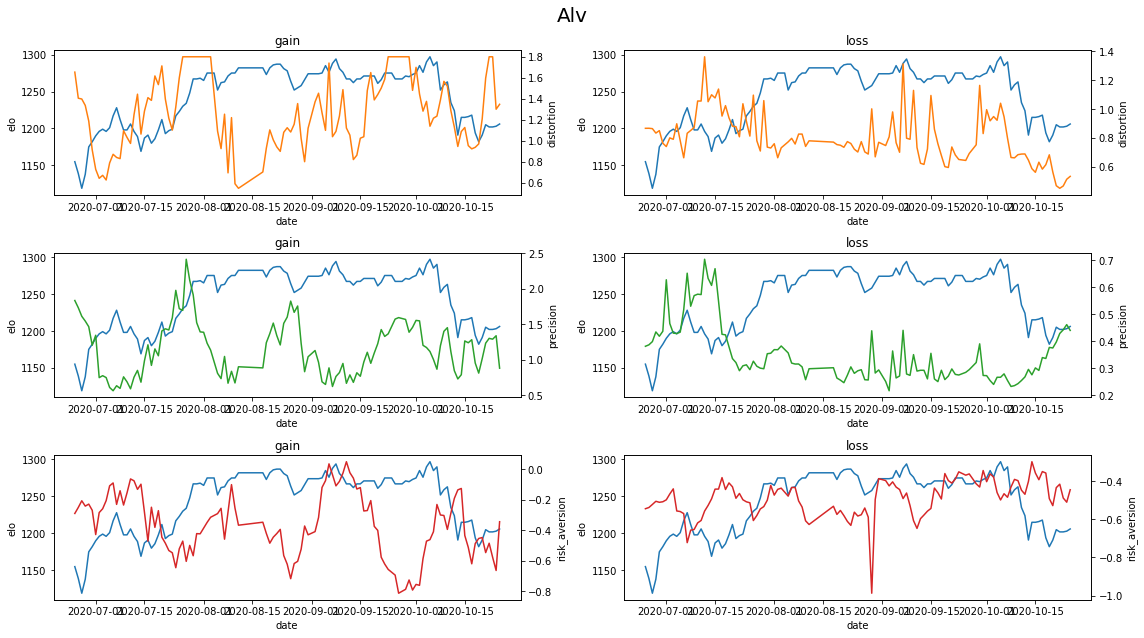

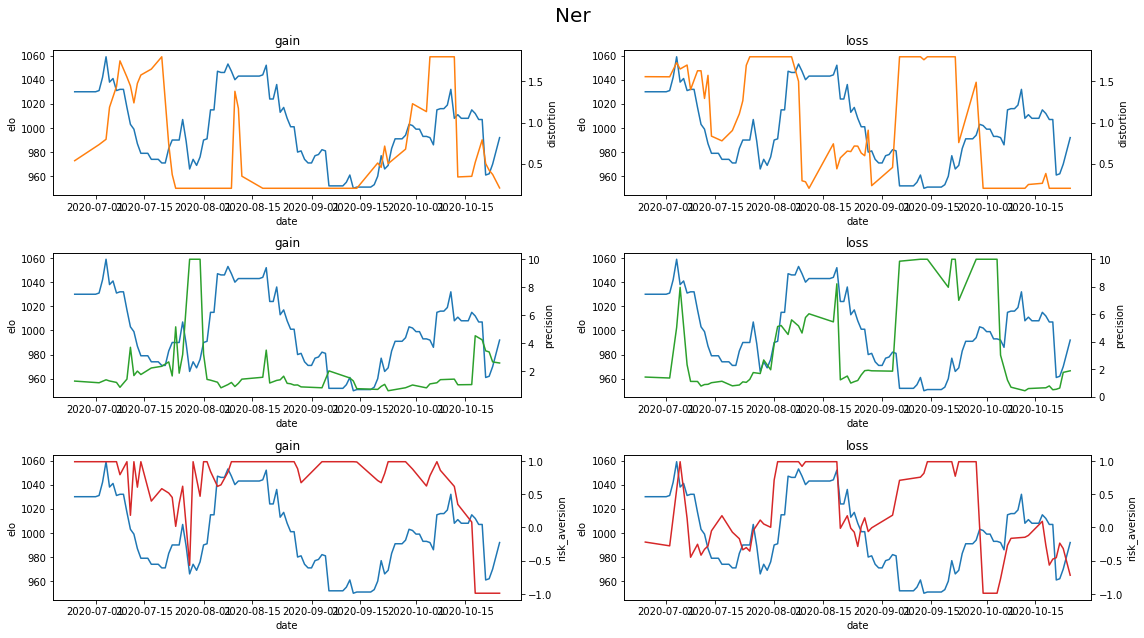

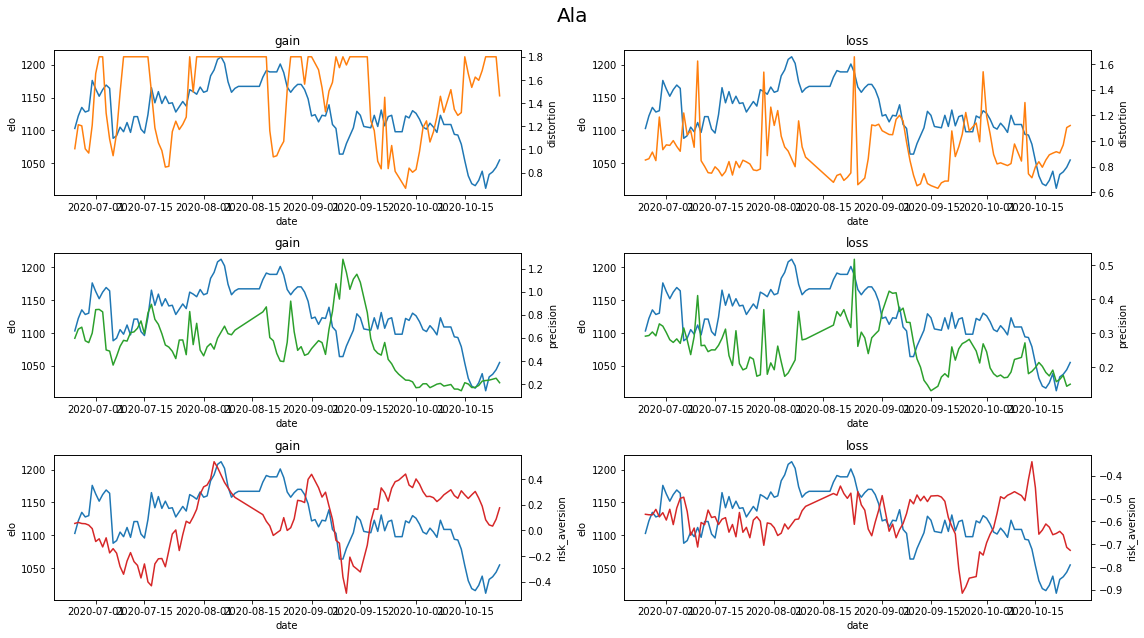

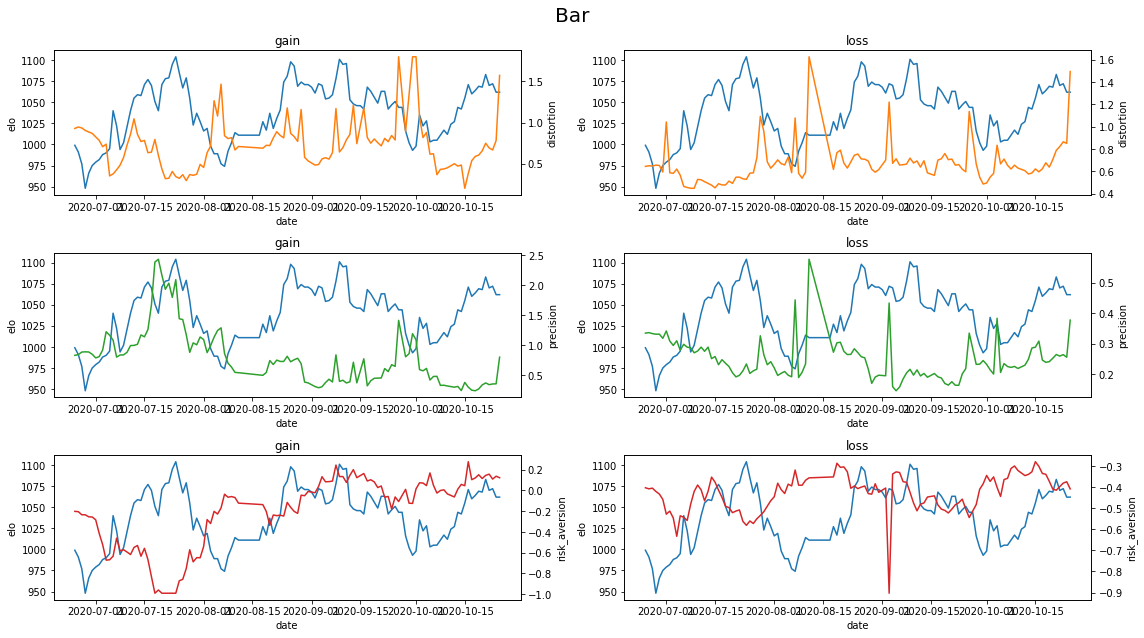

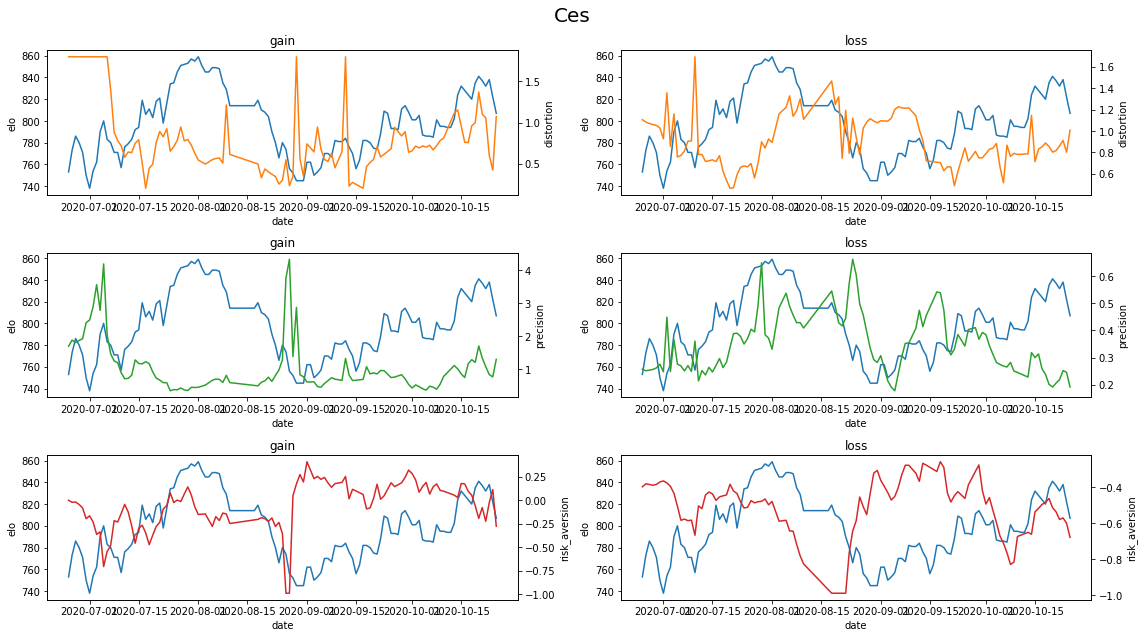

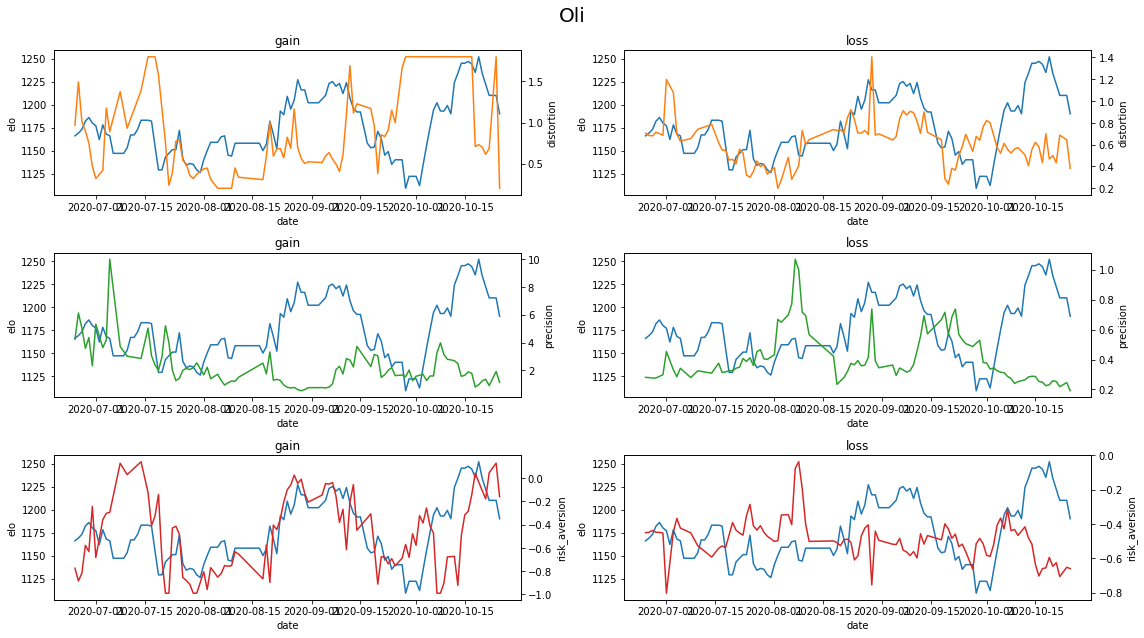

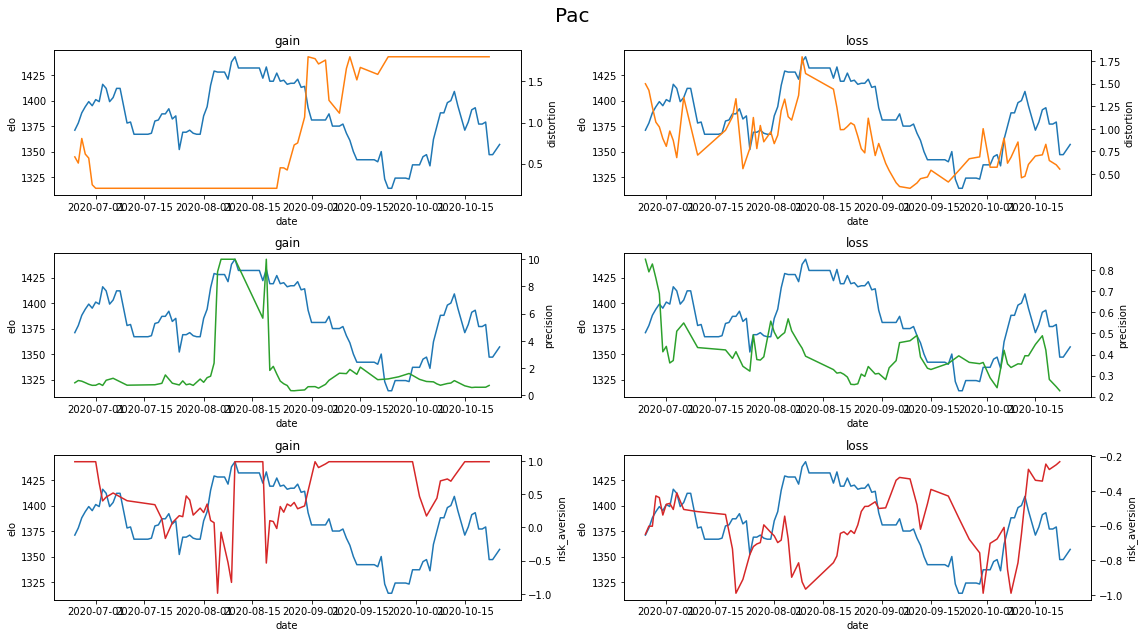

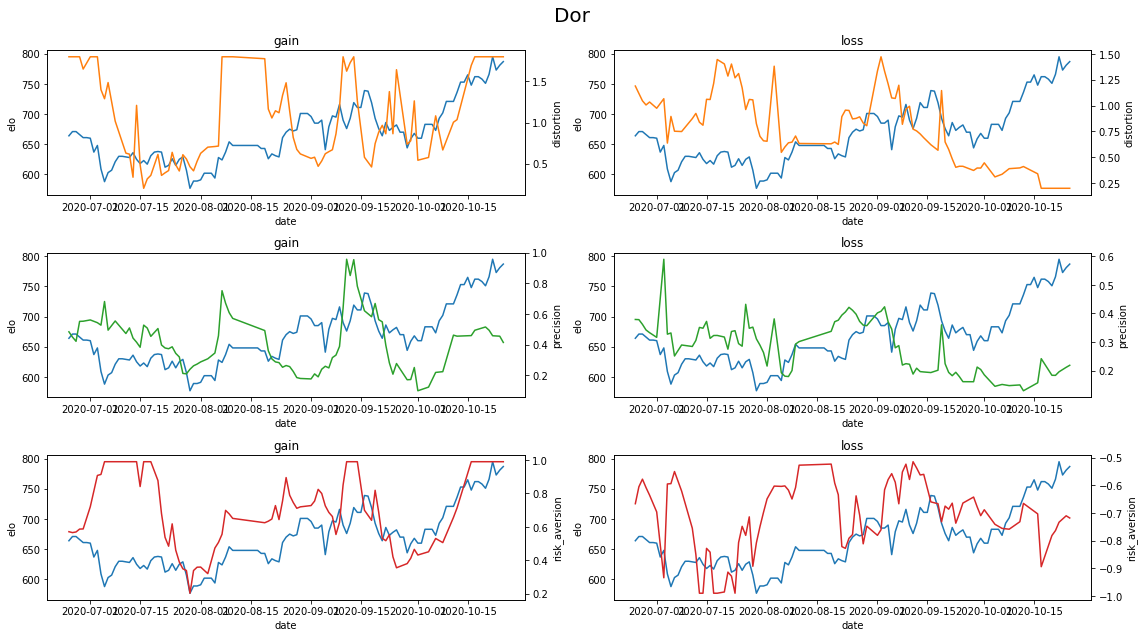

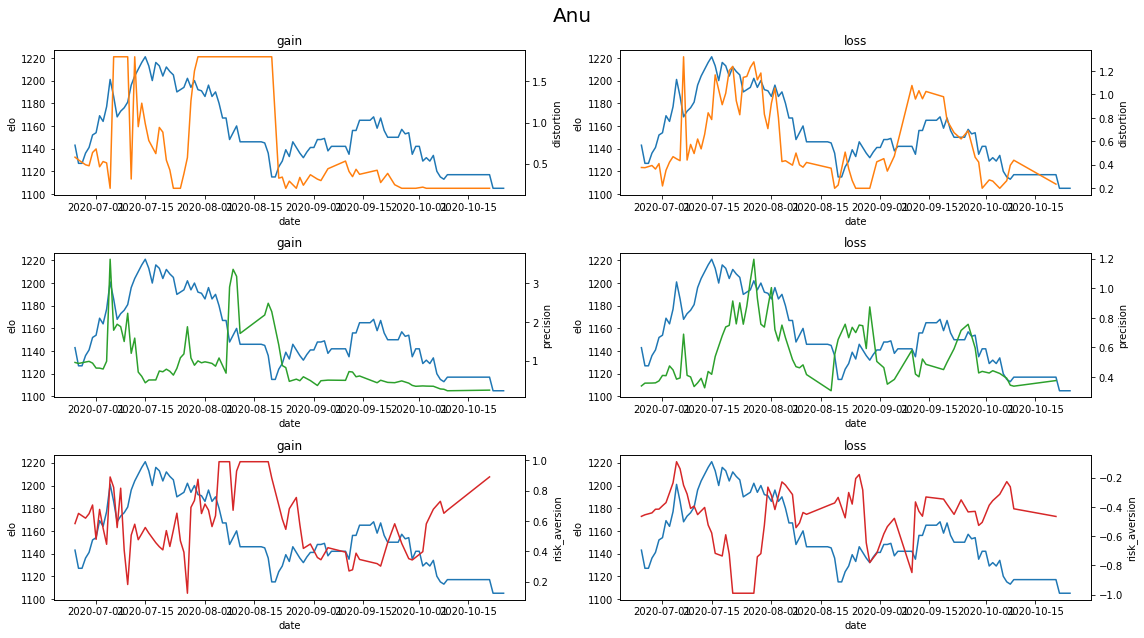

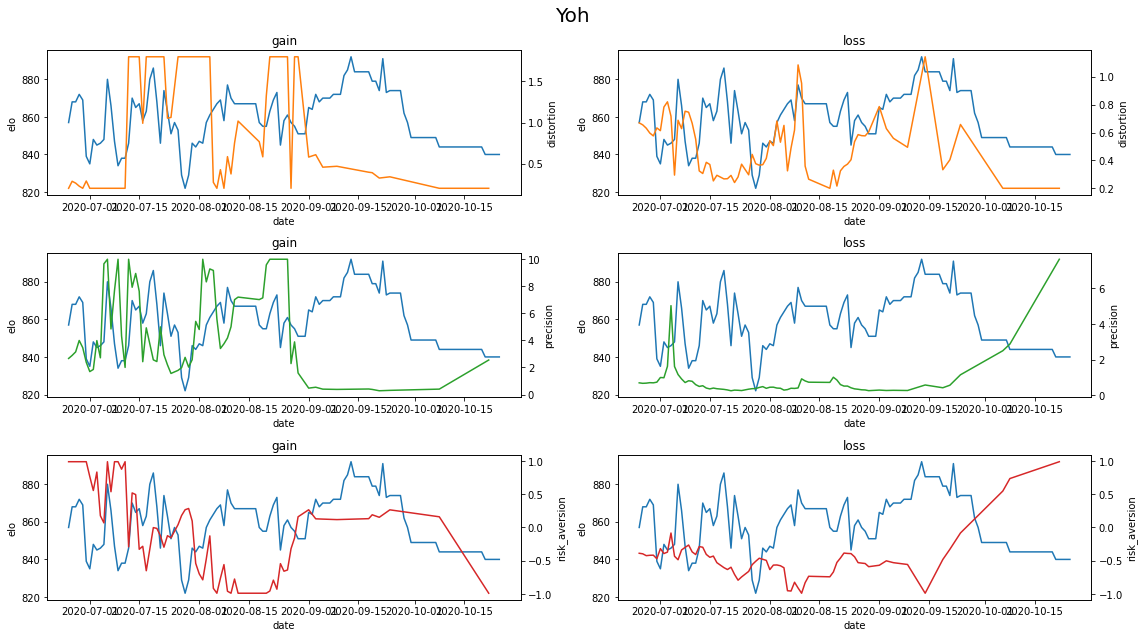

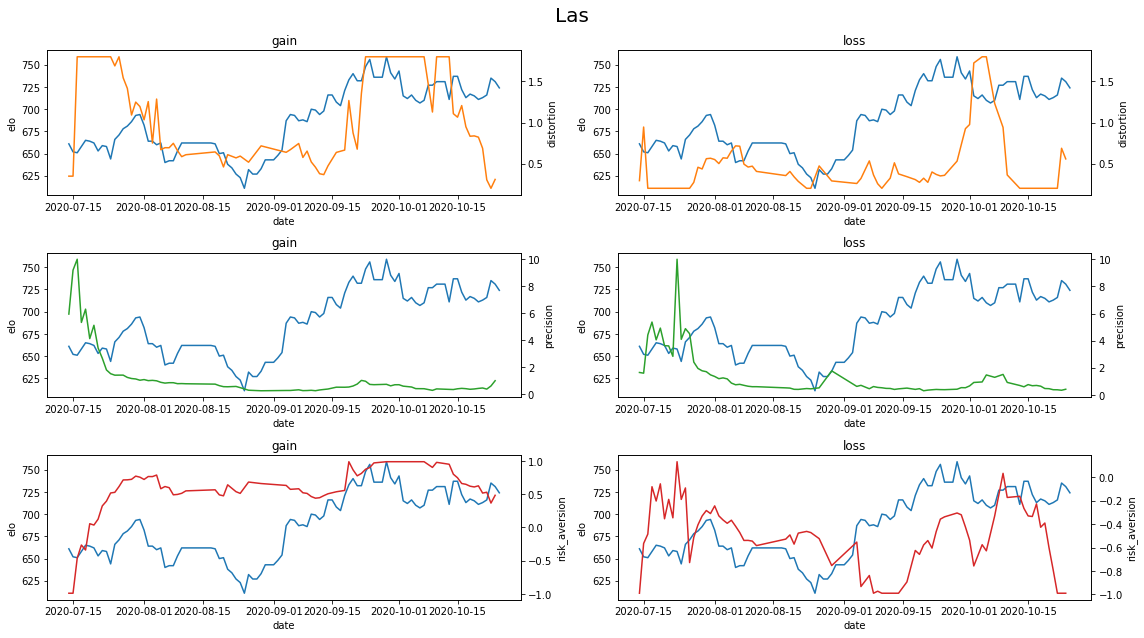

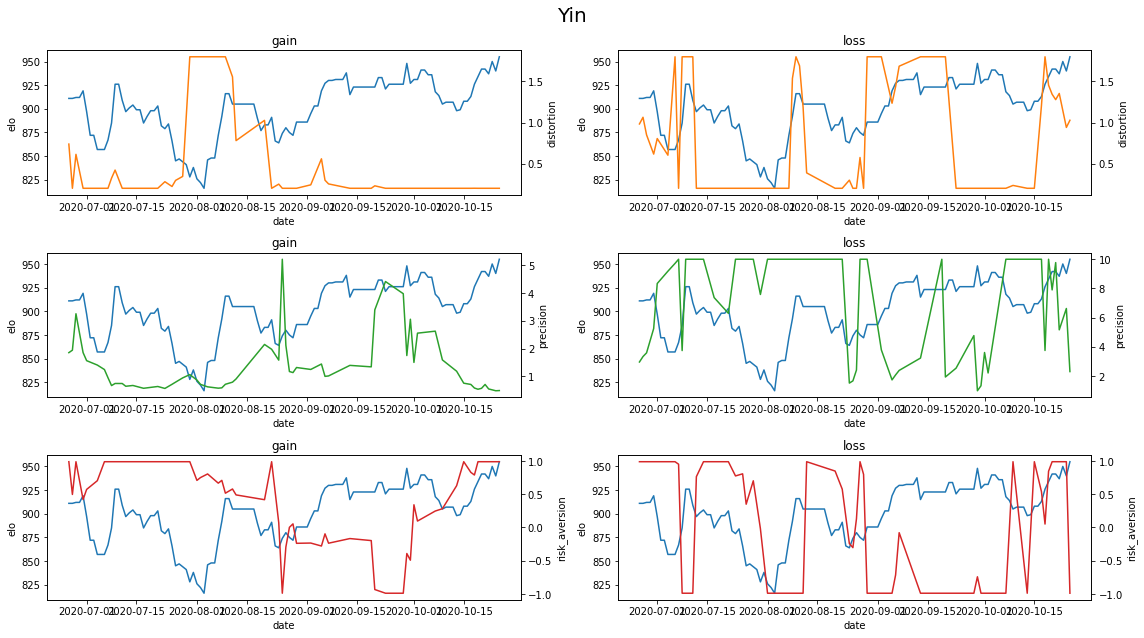

In [37]:
monkeys = df_fit.monkey.unique()
cond = ("gain", "loss")

for i, m in enumerate(monkeys):
    
    fig, axes = plt.subplots(figsize=(16, 3*n_param), nrows=n_param, ncols=len(cond))
    fig.suptitle(m, fontsize=20)
    colors = [f"C{k}" for k in range(1, n_param+1)]
    
    for j, cd in enumerate(cond):
        
        df_p = df_fit[(df_fit.monkey == m) & (df_fit.condition == cd)]
        
        df_elo_m = df_elo[m.lower()]
        df_elo_m = df_elo_m[df_elo_m.index >= min(df_p.date)]
        
        for k in range(n_param):

            ax = axes[k, j]
            ax.set_title(cd)
            param = Model.param_labels[k]
            color = colors[k]

            sns.lineplot(data=df_elo_m, ax=ax)
            ax.set_ylabel("elo")
            ax_tw = ax.twinx()
            sns.lineplot(x="date", y=param, data=df_p, ax=ax_tw, color=color)
    
    plt.tight_layout()
    plt.show()